# Introduction and Problem Statement

## Telecom Churn Case Study

### Business Problem Overview

The telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Understanding Data

In this case study,there are two main models of payment in the telecom industry - postpaid and prepaid. We analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.Churn prediction is usually more critical for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.This project is based on the Indian and Southeast Asian market.
Churn is predicted using two approaches. Usage based churn and Revenue based churn. Usage based churn:
Customers who have zero usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
This case study only considers usage based churn. In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage. Hence, this case study focuses on high value customers only.
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

## Data Understanding

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Setting max display columns and rows.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
data_tele=pd.read_csv('telecom_churn_data.csv')
data_tele.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# information about data.
print(data_tele.info())
def metadata_matrix(data_tele) : 
    return pd.DataFrame({
                'Datatype' : data_tele.dtypes.astype(str), 
                'Non_Null_Count': data_tele.count(axis = 0).astype(int), 
                'Null_Count': data_tele.isnull().sum().astype(int), 
                'Null_Percentage': round(data_tele.isnull().sum()/len(data_tele) * 100 , 2), 
                'Unique_Values_Count': data_tele.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(data_tele)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,25153,74846,74.85,7418
night_pck_user_6,float64,25153,74846,74.85,2
total_rech_data_6,float64,25153,74846,74.85,37
arpu_2g_6,float64,25153,74846,74.85,6990
max_rech_data_6,float64,25153,74846,74.85,48
fb_user_6,float64,25153,74846,74.85,2
av_rech_amt_data_6,float64,25153,74846,74.85,887
date_of_last_rech_data_6,object,25153,74846,74.85,30
count_rech_2g_6,float64,25153,74846,74.85,31
count_rech_3g_6,float64,25153,74846,74.85,25


In [4]:
data_tele.shape

(99999, 226)

In [5]:
data_tele.size

22599774

In [6]:
data_tele.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

# Data Cleaning

In [7]:
# Check duplicates
data_tele['mobile_number'].value_counts().sum()

99999

As we can see number of rows is equal as distinct mobile number, so there is no duplicate data.

As mobile_number is a unique identifier,so we will set index as Mobile Number

In [8]:
data_tele = data_tele.set_index('mobile_number')

In [9]:
# columns rename
data_tele = data_tele.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

In [10]:
# we will Convert columns into appropriate data types.
# Columns with unique values(greater than 29)are considered as categorical variables. 

columns_tele=data_tele.columns
change_to_cat=[]
single_value_col=[]
for column in columns_tele:
    unique_value_count=data_tele[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and data_tele[column].dtype in ['int','float']:
        change_to_cat.append(column)
print( ' Columns to change to categorical data type : \n' ,pd.DataFrame(change_to_cat), '\n')

 Columns to change to categorical data type : 
                    0
0     loc_og_t2o_mou
1     std_og_t2o_mou
2     loc_ic_t2o_mou
3   std_og_t2c_mou_6
4   std_og_t2c_mou_7
5   std_og_t2c_mou_8
6   std_og_t2c_mou_9
7   std_ic_t2o_mou_6
8   std_ic_t2o_mou_7
9   std_ic_t2o_mou_8
10  std_ic_t2o_mou_9
11   count_rech_3g_6
12   count_rech_3g_7
13   count_rech_3g_8
14   count_rech_3g_9
15  night_pck_user_6
16  night_pck_user_7
17  night_pck_user_8
18  night_pck_user_9
19         fb_user_6
20         fb_user_7
21         fb_user_8
22         fb_user_9 



In [11]:
# Convert all the above columns having <=29 unique values into categorical data type.
data_tele[change_to_cat]=data_tele[change_to_cat].astype('category')

In [12]:
sachet = data_tele.filter(regex='.*sachet.*', axis=1).columns.values
data_tele[sachet] = data_tele[sachet].astype('category')

In [13]:
#Change the datatype of date variables to datetime.
columns_tele=data_tele.columns
col_with_date=[]
import re
for column in columns_tele:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
data_tele[col_with_date].dtypes

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [14]:
data_tele[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
7001865778,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
7001625959,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
7001204172,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
7000142493,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [15]:
# convert to datetime datatype
for col in col_with_date:
    data_tele[col]=pd.to_datetime(data_tele[col], format="%m/%d/%Y")
data_tele[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
7001865778,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
7001625959,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
7001204172,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
7000142493,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT


Such customers whose value is more than or equal to 70th percentile of average recharge amount, they are high value customers.

In [16]:
# average recharging amount of June and July.
data_tele['Average_rech_amt_6n7']=(data_tele['total_rech_amt_6']+data_tele['total_rech_amt_7'])/2

In [17]:
#Filter based HIGH VALUED CUSTOMERS
data_tele=data_tele[(data_tele['Average_rech_amt_6n7']>= data_tele['Average_rech_amt_6n7'].quantile(0.7))]

# Missing Values

In [18]:
#Checking for missing values.
data_missing = metadata_matrix(data_tele)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
data_missing

,Datatype,Null_Percentage
av_rech_amt_data_6,float64,62.02
count_rech_2g_6,float64,62.02
arpu_2g_6,float64,62.02
max_rech_data_6,float64,62.02
night_pck_user_6,category,62.02
date_of_last_rech_data_6,datetime64[ns],62.02
total_rech_data_6,float64,62.02
arpu_3g_6,float64,62.02
fb_user_6,category,62.02
count_rech_3g_6,category,62.02


In [19]:
# high missing values columns
metadata = metadata_matrix(data_tele)
condition = metadata['Null_Percentage'] > 50 
high_missing= metadata[condition]
high_missing

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
av_rech_amt_data_6,float64,11397,18614,62.02,794
count_rech_3g_6,category,11397,18614,62.02,25
count_rech_2g_6,float64,11397,18614,62.02,30
arpu_2g_6,float64,11397,18614,62.02,4503
max_rech_data_6,float64,11397,18614,62.02,43
night_pck_user_6,category,11397,18614,62.02,2
date_of_last_rech_data_6,datetime64[ns],11397,18614,62.02,30
total_rech_data_6,float64,11397,18614,62.02,36
arpu_3g_6,float64,11397,18614,62.02,4875
fb_user_6,category,11397,18614,62.02,2


In [20]:
# Drop columns with high missing data
high_missing_data_columns = high_missing.index 
data_tele.drop(columns=high_missing_data_columns, inplace=True)

In [21]:
metadata_matrix(data_tele)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2o_mou_9,category,28307,1704,5.68,1
spl_og_mou_9,float64,28307,1704,5.68,2966
isd_og_mou_9,float64,28307,1704,5.68,908
roam_ic_mou_9,float64,28307,1704,5.68,3370
std_og_mou_9,float64,28307,1704,5.68,15900
roam_og_mou_9,float64,28307,1704,5.68,4004
std_ic_t2f_mou_9,float64,28307,1704,5.68,1971
std_og_t2c_mou_9,category,28307,1704,5.68,1
loc_og_t2t_mou_9,float64,28307,1704,5.68,10360
std_og_t2f_mou_9,float64,28307,1704,5.68,1595


Above in missing value treatment, each months revenue and data usage is not related to the other months.Thus it can be performed month wise.

As we have information of month - 6,7,8,9

### Month - 6

In [22]:
month6_columns = []
for column in data_tele.columns:
    x = re.search("6$", column)
    if x:
        month6_columns.append(column)

metadata = metadata_matrix(data_tele)
condition = metadata.index.isin(month6_columns)
month6_metadata = metadata[condition]
month6_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_mou_6,float64,29695,316,1.05,8391
offnet_mou_6,float64,29695,316,1.05,22454
std_ic_t2f_mou_6,float64,29695,316,1.05,2033
isd_ic_mou_6,float64,29695,316,1.05,3429
ic_others_6,float64,29695,316,1.05,1227
onnet_mou_6,float64,29695,316,1.05,18813
std_ic_t2m_mou_6,float64,29695,316,1.05,6680
loc_ic_t2t_mou_6,float64,29695,316,1.05,9872
loc_ic_t2m_mou_6,float64,29695,316,1.05,16015
loc_ic_t2f_mou_6,float64,29695,316,1.05,4817


## Conclusion
All the columns with "_mou" have exactly 3.94% rows with meaningful missing values.
*_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. Probably, the 3.94% customers not using calling plans.This could confirmed by looking at 'total_og_mou_6' and 'total_ic_mou_6' related columns where _mou columns have missing values. If these columns are zero for a customer , then all _mou columns should be zero too.

In [23]:
month6_meaningful_missing = month6_metadata['Null_Percentage'] == 1.05
month6_meaningful_missing_columns = month6_metadata[month6_meaningful_missing].index.values
month6_meaningful_missing_columns

array(['std_ic_mou_6', 'offnet_mou_6', 'std_ic_t2f_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'onnet_mou_6', 'std_ic_t2m_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'og_others_6', 'spl_og_mou_6',
       'roam_ic_mou_6', 'spl_ic_mou_6', 'std_og_t2t_mou_6',
       'loc_og_t2c_mou_6', 'std_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'std_og_t2f_mou_6', 'loc_og_t2m_mou_6', 'std_ic_t2o_mou_6',
       'std_og_t2c_mou_6', 'std_og_mou_6', 'loc_og_t2t_mou_6',
       'isd_og_mou_6', 'roam_og_mou_6', 'loc_og_mou_6'], dtype=object)

In [24]:
# sixth month columns where rows of *_mou are null
condition_tele = data_tele[month6_meaningful_missing_columns].isnull()

miss_rows = pd.Series([True]*data_tele.shape[0], index = data_tele.index)
for column in month6_meaningful_missing_columns : 
    miss_rows = miss_rows & data_tele[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data_tele.loc[miss_rows,'total_og_mou_6'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data_tele.loc[miss_rows,'total_ic_mou_6'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [25]:
# Imputation of data
data_tele[month6_meaningful_missing_columns] = data_tele[month6_meaningful_missing_columns].fillna(0)

meta_data = metadata_matrix(data_tele)

# Remaining Missing Values
meta_data.iloc[metadata.index.isin(month6_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2t_mou_7,float64,29708,303,1.01,9961
og_others_7,float64,29708,303,1.01,123
loc_ic_t2f_mou_7,float64,29708,303,1.01,4897
loc_ic_t2m_mou_7,float64,29708,303,1.01,16068
loc_ic_mou_7,float64,29708,303,1.01,19030
std_ic_t2t_mou_7,float64,29708,303,1.01,4706
std_ic_t2f_mou_7,float64,29708,303,1.01,2075
std_ic_t2o_mou_7,category,29708,303,1.01,1
std_ic_mou_7,float64,29708,303,1.01,8543
spl_ic_mou_7,float64,29708,303,1.01,93


There are '1.61%' customers with missing date of last recharge

In [26]:
condition_tele = data_tele['date_of_last_rech_6'].isnull()
data_tele[condition_tele].filter(regex='.*rech.*6$', axis=1).head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6
mobile_number,,,,
7001588448,0,0,0,NaT
7001223277,0,0,0,NaT
7000721536,0,0,0,NaT
7001490351,0,0,0,NaT
7000665415,0,0,0,NaT


In [27]:
data_tele[condition_tele].filter(regex='.*rech.*6$', axis=1).nunique()

total_rech_num_6       1
total_rech_amt_6       1
max_rech_amt_6         1
date_of_last_rech_6    0
dtype: int64

'date_of_last_rech_6' is missing since there were no recharges made in this month.These are meaning missing values

In [28]:
# Check for missing values in 6th month variables
meta_data = metadata_matrix(data_tele)
meta_data[meta_data.index.isin(month6_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
monthly_2g_6,int64,30011,0,0.00,5
vbc_3g_6,float64,30011,0,0.00,6864
max_rech_amt_6,int64,30011,0,0.00,170
sachet_3g_6,category,30011,0,0.00,25
sachet_2g_6,category,30011,0,0.00,30
vol_2g_mb_6,float64,30011,0,0.00,7809
monthly_3g_6,int64,30011,0,0.00,12
vol_3g_mb_6,float64,30011,0,0.00,7043
last_day_rch_amt_6,int64,30011,0,0.00,158


In [29]:
# Month 7 
month7_columns = data_tele.filter(regex='7$', axis=1).columns
month7_columns

Index(['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7',
       'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7', 'vbc_3g_7', 'Average_rech_amt_6n7'],
      dtype='object')

In [30]:
month7_metadata = meta_data[meta_data.index.isin(month7_columns)]
month7_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2t_mou_7,float64,29708,303,1.01,9961
og_others_7,float64,29708,303,1.01,123
loc_ic_t2f_mou_7,float64,29708,303,1.01,4897
loc_ic_t2m_mou_7,float64,29708,303,1.01,16068
loc_ic_mou_7,float64,29708,303,1.01,19030
std_ic_t2t_mou_7,float64,29708,303,1.01,4706
std_ic_t2f_mou_7,float64,29708,303,1.01,2075
std_ic_t2o_mou_7,category,29708,303,1.01,1
std_ic_mou_7,float64,29708,303,1.01,8543
spl_ic_mou_7,float64,29708,303,1.01,93


##### Conclusion
All the columns with "_mou" have exactly 3.86% rows with meaningful missing values.
Further note that "_mou" columns indicate minutes of usage, which are applicable only to customers using calling plans.Probably, the 3.86% customers not using calling plans.
This could confirmed by looking at 'total_og_mou_7' and 'total_ic_mou_7' related columns where _mou columns have missing values. If these columns are zero for a customer , then all _mou columns should be zero too.

In [31]:
### Meaningful missing value of month 7
month7_meaningful_missing_value = month7_metadata['Null_Percentage'] == 1.01
month7_meaningful_missing_columns = month7_metadata[month7_meaningful_missing_value].index.values
month7_meaningful_missing_columns

array(['loc_ic_t2t_mou_7', 'og_others_7', 'loc_ic_t2f_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7',
       'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'std_ic_t2m_mou_7',
       'isd_og_mou_7', 'spl_og_mou_7', 'std_og_t2f_mou_7', 'onnet_mou_7',
       'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7',
       'loc_og_t2t_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'loc_og_t2m_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7'],
      dtype=object)

In [32]:
condition_tele = data_tele[month7_meaningful_missing_columns].isnull()

 
miss_rows = pd.Series([True]*data_tele.shape[0], index = data_tele.index)
for column in month7_meaningful_missing_columns : 
    miss_rows = miss_rows & data_tele[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data_tele.loc[miss_rows,'total_og_mou_7'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data_tele.loc[miss_rows,'total_ic_mou_7'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [33]:
data_tele[month7_meaningful_missing_columns] = data_tele[month7_meaningful_missing_columns].fillna(0)

meta_data = metadata_matrix(data_tele)
meta_data.iloc[meta_data.index.isin(month7_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
last_date_of_month_7,object,29980,31,0.10,1
total_rech_num_7,int64,30011,0,0.00,101
ic_others_7,float64,30011,0,0.00,1371
isd_ic_mou_7,float64,30011,0,0.00,3639
spl_ic_mou_7,float64,30011,0,0.00,93
total_rech_amt_7,int64,30011,0,0.00,2265
sachet_2g_7,category,30011,0,0.00,34
monthly_3g_7,int64,30011,0,0.00,15
sachet_3g_7,category,30011,0,0.00,27


From above there '1.77%' customers with missing date of last recharge

In [34]:
#  customers with missing 'date_of_last_rech_7' 
condition_tele = data_tele['date_of_last_rech_7'].isnull()
data_tele[condition_tele].filter(regex='.*rech.*7$', axis=1).head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,Average_rech_amt_6n7
mobile_number,,,,,
7000369789,0,0,0,NaT,393.0
7001967148,0,0,0,NaT,500.5
7000066601,0,0,0,NaT,490.0
7001189556,0,0,0,NaT,523.5
7002024450,0,0,0,NaT,493.0


In [35]:
data_tele[condition_tele].filter(regex='.*rech.*7$', axis=1).nunique()

total_rech_num_7         1
total_rech_amt_7         1
max_rech_amt_7           1
date_of_last_rech_7      0
Average_rech_amt_6n7    90
dtype: int64

#### Conclusion
The recharge related columns for customers with missing 'date_of_last_rech_7' has just one unique value.'date_of_last_rech_7' is missing since there were no recharges made in this month,these are meaning missing values.

## Month - 8

In [37]:
month8_columns = data_tele.filter(regex="8$", axis=1).columns
meta_data = metadata_matrix(data_tele)
condition_tele = meta_data.index.isin(month8_columns)
month8_metadata = meta_data[condition_tele]
month8_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_8,category,29073,938,3.13,1
std_og_mou_8,float64,29073,938,3.13,16864
isd_og_mou_8,float64,29073,938,3.13,940
loc_ic_mou_8,float64,29073,938,3.13,18573
std_og_t2m_mou_8,float64,29073,938,3.13,13326
loc_ic_t2m_mou_8,float64,29073,938,3.13,15598
loc_og_mou_8,float64,29073,938,3.13,18885
std_og_t2t_mou_8,float64,29073,938,3.13,11781
std_og_t2f_mou_8,float64,29073,938,3.13,1627
loc_ic_t2f_mou_8,float64,29073,938,3.13,4705


In [38]:
# meaningful missing values in 8th month 
month8_meaningful_missing_value = month8_metadata['Null_Percentage'] == 3.13
month8_meaningful_missing_columns = month8_metadata[month8_meaningful_missing_value].index.values
month8_meaningful_missing_columns

array(['std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'loc_ic_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2f_mou_8', 'loc_ic_t2f_mou_8',
       'loc_og_t2c_mou_8', 'ic_others_8', 'loc_og_t2m_mou_8',
       'spl_og_mou_8', 'roam_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'std_ic_t2o_mou_8', 'onnet_mou_8', 'loc_og_t2f_mou_8',
       'offnet_mou_8', 'std_ic_t2f_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2t_mou_8',
       'roam_og_mou_8', 'isd_ic_mou_8', 'loc_og_t2t_mou_8'], dtype=object)

In [39]:
# 8th month columns where rows of *_mou are null
condition_tele = data_tele[month8_meaningful_missing_columns].isnull()
 
miss_rows = pd.Series([True]*data_tele.shape[0], index = data_tele.index)
for column in month8_meaningful_missing_columns : 
    miss_rows = miss_rows & data_tele[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data_tele.loc[miss_rows,'total_og_mou_8'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data_tele.loc[miss_rows,'total_ic_mou_8'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [40]:
data_tele[month8_meaningful_missing_columns] = data_tele[month8_meaningful_missing_columns].fillna(0)

meta_data = metadata_matrix(data_tele)


meta_data.iloc[meta_data.index.isin(month8_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
last_date_of_month_8,object,29854,157,0.52,1
spl_ic_mou_8,float64,30011,0,0.00,85
total_rech_num_8,int64,30011,0,0.00,96
std_ic_t2f_mou_8,float64,30011,0,0.00,1941
ic_others_8,float64,30011,0,0.00,1259
std_ic_t2o_mou_8,category,30011,0,0.00,1
std_ic_mou_8,float64,30011,0,0.00,8033
total_ic_mou_8,float64,30011,0,0.00,20096
isd_ic_mou_8,float64,30011,0,0.00,3493


In [41]:
### customers with missing 'date_of_last_rech_8' 
condition_tele = data_tele['date_of_last_rech_8'].isnull()
data_tele[condition_tele].filter(regex='.*rech.*8$', axis=1).head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8
mobile_number,,,,
7000340381,0,0,0,NaT
7000608224,0,0,0,NaT
7000369789,0,0,0,NaT
7000248548,0,0,0,NaT
7001967063,0,0,0,NaT


In [42]:
data_tele[condition_tele].filter(regex='.*rech.*8$', axis=1).nunique()

total_rech_num_8       1
total_rech_amt_8       1
max_rech_amt_8         1
date_of_last_rech_8    0
dtype: int64

## Month - 9

In [43]:
month9_columns = data_tele.filter(regex="9$", axis=1).columns
meta_data = metadata_matrix(data_tele)
condition_tele = meta_data.index.isin(month9_columns)
month9_metadata = meta_data[condition_tele]
month9_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_9,category,28307,1704,5.68,1
spl_ic_mou_9,float64,28307,1704,5.68,287
loc_og_t2m_mou_9,float64,28307,1704,5.68,15585
og_others_9,float64,28307,1704,5.68,132
loc_og_t2c_mou_9,float64,28307,1704,5.68,1576
isd_ic_mou_9,float64,28307,1704,5.68,3329
loc_og_t2t_mou_9,float64,28307,1704,5.68,10360
spl_og_mou_9,float64,28307,1704,5.68,2966
loc_ic_t2t_mou_9,float64,28307,1704,5.68,9407
loc_og_mou_9,float64,28307,1704,5.68,18207


In [44]:
#  columns with meaningful missing in 9th month 
month9_meaningful_missing_value = month9_metadata['Null_Percentage'] == 5.68
month9_meaningful_missing_columns = month9_metadata[month9_meaningful_missing_value].index.values
month9_meaningful_missing_columns

array(['std_og_t2c_mou_9', 'spl_ic_mou_9', 'loc_og_t2m_mou_9',
       'og_others_9', 'loc_og_t2c_mou_9', 'isd_ic_mou_9',
       'loc_og_t2t_mou_9', 'spl_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_og_mou_9', 'roam_og_mou_9', 'std_ic_mou_9',
       'loc_ic_t2m_mou_9', 'roam_ic_mou_9', 'std_og_t2t_mou_9',
       'offnet_mou_9', 'loc_ic_t2f_mou_9', 'std_ic_t2f_mou_9',
       'isd_og_mou_9', 'std_og_mou_9', 'std_og_t2f_mou_9', 'ic_others_9',
       'std_ic_t2t_mou_9', 'std_ic_t2o_mou_9', 'loc_og_t2f_mou_9',
       'std_og_t2m_mou_9', 'loc_ic_mou_9', 'std_ic_t2m_mou_9',
       'onnet_mou_9'], dtype=object)

In [45]:
# 9th month columns where rows of *_mou are null
condition_tele = data_tele[month9_meaningful_missing_columns].isnull()

miss_rows = pd.Series([True]*data_tele.shape[0], index = data_tele.index)
for column in month9_meaningful_missing_columns : 
    miss_rows = miss_rows & data_tele[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data_tele.loc[miss_rows,'total_og_mou_9'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data_tele.loc[miss_rows,'total_ic_mou_9'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [45]:
data_tele[month9_meaningful_missing_columns] = data_tele[month9_meaningful_missing_columns].fillna(0)

meta_data = metadata_matrix(data_tele)

# Remaining Missing Values
meta_data.iloc[meta_data.index.isin(month9_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
last_date_of_month_9,object,29651,360,1.20,1
spl_ic_mou_9,float64,30011,0,0.00,287
total_ic_mou_9,float64,30011,0,0.00,19437
std_ic_mou_9,float64,30011,0,0.00,7745
isd_ic_mou_9,float64,30011,0,0.00,3329
ic_others_9,float64,30011,0,0.00,1284
loc_ic_mou_9,float64,30011,0,0.00,18018
std_ic_t2t_mou_9,float64,30011,0,0.00,4280
std_ic_t2m_mou_9,float64,30011,0,0.00,6168


In [46]:
# customers with missing 'date_of_last_rech_9' 
condition_tele = data_tele['date_of_last_rech_9'].isnull()
data_tele[condition_tele].filter(regex='.*rech.*9$', axis=1).head()

,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9
mobile_number,,,,
7000340381,0,0,0,NaT
7000854899,0,0,0,NaT
7000369789,0,0,0,NaT
7001967063,0,0,0,NaT
7000066601,0,0,0,NaT


In [47]:
data_tele[condition_tele].filter(regex='.*rech.*9$', axis=1).nunique()

total_rech_num_9       1
total_rech_amt_9       1
max_rech_amt_9         1
date_of_last_rech_9    0
dtype: int64

In [48]:
### Imputing Last date of month
print('Missing Value Percentage in last_date_of_month columns : \n', 100*data_tele.filter(regex='last_date_of_month_.*', axis=1).isnull().sum() / data_tele.shape[0], '\n')
print('The unique values in last_date_of_month_6 : ' , data_tele['last_date_of_month_6'].unique())
print('The unique values in last_date_of_month_7 : ' , data_tele['last_date_of_month_7'].unique())
print('The unique values in last_date_of_month_8 : ' , data_tele['last_date_of_month_8'].unique())
print('The unique values in last_date_of_month_9 : ' , data_tele['last_date_of_month_9'].unique())

Missing Value Percentage in last_date_of_month columns : 
 last_date_of_month_6    0.000000
last_date_of_month_7    0.103295
last_date_of_month_8    0.523142
last_date_of_month_9    1.199560
dtype: float64 

The unique values in last_date_of_month_6 :  ['6/30/2014']
The unique values in last_date_of_month_7 :  ['7/31/2014' nan]
The unique values in last_date_of_month_8 :  ['8/31/2014' nan]
The unique values in last_date_of_month_9 :  ['9/30/2014' nan]


Last date of month is the last calender date of a particular month, it is independent of the churn data.Lets impute these missing values using mode.

In [49]:
data_tele['last_date_of_month_7'] = data_tele['last_date_of_month_7'].fillna(data_tele['last_date_of_month_7'].mode()[0])
data_tele['last_date_of_month_8'] = data_tele['last_date_of_month_8'].fillna(data_tele['last_date_of_month_8'].mode()[0])
data_tele['last_date_of_month_9'] = data_tele['last_date_of_month_9'].fillna(data_tele['last_date_of_month_9'].mode()[0])

In [50]:
data_tele['last_date_of_month_7'].unique()

array(['7/31/2014'], dtype=object)

In [51]:
meta_data = metadata_matrix(data_tele)
meta_data

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2m_mou_9,float64,28307,1704,5.68,6168
loc_ic_t2t_mou_9,float64,28307,1704,5.68,9407
std_ic_mou_9,float64,28307,1704,5.68,7745
roam_og_mou_9,float64,28307,1704,5.68,4004
loc_og_t2t_mou_9,float64,28307,1704,5.68,10360
og_others_9,float64,28307,1704,5.68,132
loc_og_t2m_mou_9,float64,28307,1704,5.68,15585
spl_ic_mou_9,float64,28307,1704,5.68,287
spl_og_mou_9,float64,28307,1704,5.68,2966
loc_og_t2f_mou_9,float64,28307,1704,5.68,3111


In [52]:
print(data_tele[data_tele['date_of_last_rech_6'].isnull()][['date_of_last_rech_6','total_rech_amt_6','total_rech_num_6']].nunique())
print(data_tele[data_tele['date_of_last_rech_7'].isnull()][['date_of_last_rech_7','total_rech_amt_7','total_rech_num_7']].nunique())
print(data_tele[data_tele['date_of_last_rech_8'].isnull()][['date_of_last_rech_8','total_rech_amt_8','total_rech_num_8']].nunique())
print(data_tele[data_tele['date_of_last_rech_9'].isnull()][['date_of_last_rech_9','total_rech_amt_9','total_rech_num_9']].nunique())

date_of_last_rech_6    0
total_rech_amt_6       1
total_rech_num_6       1
dtype: int64
date_of_last_rech_7    0
total_rech_amt_7       1
total_rech_num_7       1
dtype: int64
date_of_last_rech_8    0
total_rech_amt_8       1
total_rech_num_8       1
dtype: int64
date_of_last_rech_9    0
total_rech_amt_9       1
total_rech_num_9       1
dtype: int64


In [53]:
print("\n",data_tele[data_tele['date_of_last_rech_6'].isnull()][['total_rech_amt_6','total_rech_num_6']].head())
print("\n",data_tele[data_tele['date_of_last_rech_7'].isnull()][['total_rech_amt_7','total_rech_num_7']].head())
print("\n",data_tele[data_tele['date_of_last_rech_8'].isnull()][['total_rech_amt_8','total_rech_num_8']].head())
print("\n",data_tele[data_tele['date_of_last_rech_9'].isnull()][['total_rech_amt_9','total_rech_num_9']].head())


                total_rech_amt_6  total_rech_num_6
mobile_number                                    
7001588448                    0                 0
7001223277                    0                 0
7000721536                    0                 0
7001490351                    0                 0
7000665415                    0                 0

                total_rech_amt_7  total_rech_num_7
mobile_number                                    
7000369789                    0                 0
7001967148                    0                 0
7000066601                    0                 0
7001189556                    0                 0
7002024450                    0                 0

                total_rech_amt_8  total_rech_num_8
mobile_number                                    
7000340381                    0                 0
7000608224                    0                 0
7000369789                    0                 0
7000248548                    0             

The columns 'date_of_last_rech' for june,july and August does not have any value becuase there are no recharges done by the user during those months.

### Dropping columns with one unique value

In [54]:
meta_data=metadata_matrix(data_tele)
singular_value_columns=meta_data[meta_data['Unique_Values_Count']==1].index.values

In [55]:
#Drop singular value columns.
data_tele.drop(columns=singular_value_columns,inplace=True)

In [56]:
data_columns = data_tele.filter(regex='^date.*').columns
data_tele.drop(columns=data_columns, inplace=True)
metadata_matrix(data_tele)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2f_mou_9,float64,28307,1704,5.68,4611
loc_og_t2c_mou_9,float64,28307,1704,5.68,1576
loc_og_t2t_mou_9,float64,28307,1704,5.68,10360
loc_og_t2m_mou_9,float64,28307,1704,5.68,15585
spl_ic_mou_9,float64,28307,1704,5.68,287
loc_og_t2f_mou_9,float64,28307,1704,5.68,3111
og_others_9,float64,28307,1704,5.68,132
isd_ic_mou_9,float64,28307,1704,5.68,3329
spl_og_mou_9,float64,28307,1704,5.68,2966
roam_og_mou_9,float64,28307,1704,5.68,4004


### Tagging Churn (TARGET variable)

In [57]:
data_tele['Churn'] = 0
churned_customers = data_tele.query('total_og_mou_9 == 0 & total_ic_mou_9 == 0 & vol_2g_mb_9 == 0 &  vol_3g_mb_9 == 0').index
data_tele.loc[churned_customers,'Churn']=1
data_tele['Churn'] = data_tele['Churn'].astype('category')

In [58]:
data_tele['Churn'].value_counts(normalize=True).to_frame()

,Churn
0,0.913598
1,0.086402


### Dropping Churn Phase Columns

In [59]:
churn_columns = data_tele.filter(regex='9$').columns
data_tele.drop(columns=churn_columns, inplace=True)
print('Retained Columns')
data_tele.columns.to_frame(index=False)

Retained Columns


,0
0,arpu_6
1,arpu_7
2,arpu_8
3,onnet_mou_6
4,onnet_mou_7
5,onnet_mou_8
6,offnet_mou_6
7,offnet_mou_7
8,offnet_mou_8
9,roam_ic_mou_6


In [60]:
print('retained no of rows', data_tele.shape[0])
print('retain no of columns', data_tele.shape[1])

retained no of rows 30011
retain no of columns 126


## Exploratory Data Analysis (EDA)

In [61]:
data_tele.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,94.680696,95.729729,87.139995,181.279583,181.271524,167.591199,6.97933,7.097268,6.494314,1.567160,1.862229,1.712739,282.948414,284.107492,261.233938,189.753131,199.877508,172.196408,203.097767,213.411914,179.568790,2.010766,2.034241,1.789728,394.865994,415.327988,353.558826,2.264425,2.207400,2.029314,5.916364,7.425487,6.885193,0.692507,0.047600,0.059131,686.697541,709.124730,623.774684,68.749054,70.311351,65.936968,159.613810,160.813032,153.628517,15.595629,16.510023,14.706512,243.968340,247.644401,234.281577,16.229350,16.893723,15.051559,32.015163,33.47715

The telecom company has such customers that have negative average revenues in both phases. These customers are likely to churn. 

In [62]:
categorical_column = data_tele.dtypes[data_tele.dtypes == 'category'].index.values

data_tele[categorical_column].mode().T

,0
sachet_2g_6,0
sachet_2g_7,0
sachet_2g_8,0
sachet_3g_6,0
sachet_3g_7,0
sachet_3g_8,0
Churn,0


### Univariate Analysis

In [63]:
churn_customer = data_tele[data_tele['Churn'] == 1]
non_churn_customer = data_tele[data_tele['Churn'] == 0]

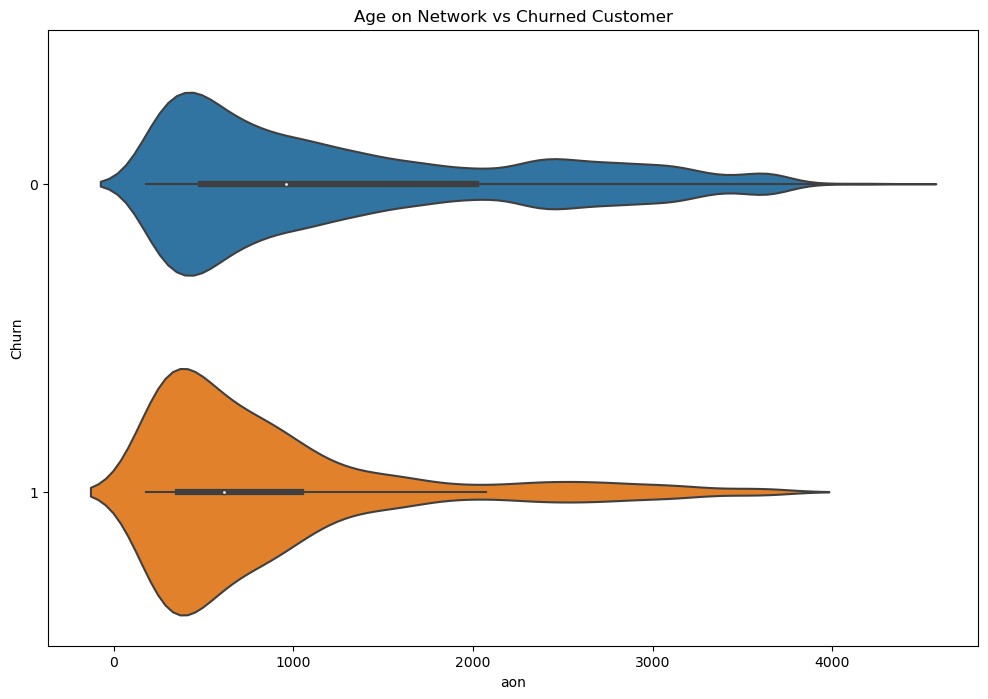

In [64]:
plt.figure(figsize=(12,8))
sns.violinplot(x='aon', y='Churn', data=data_tele)
plt.title('Age on Network vs Churned Customer')
plt.show()

The customers with less 'aon' can churn more easily when compared to the customers with high 'aon'

In [65]:
#  univariate analysis for numerical variable
from tabulate import tabulate
def num_univariate_analysis(column_names,scale='linear') : 
    # boxplot for column vs target
    
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(1,3,1)
    sns.violinplot(x='Churn', y = column_names[0], data = data_tele, ax=ax1)
    title = ''.join(column_names[0]) +' vs Churn'
    ax1.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax1.set(ylabel= column_names[0] + '(Log Scale)')
        
    ax2 = fig.add_subplot(1,3,2)
    sns.violinplot(x='Churn', y = column_names[1], data = data_tele, ax=ax2)
    title = ''.join(column_names[1]) +' vs Churn'
    ax2.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax2.set(ylabel= column_names[1] + '(Log Scale)')
    
    ax3 = fig.add_subplot(1,3,3)
    sns.violinplot(x='Churn', y = column_names[2], data = data_tele, ax=ax3)
    title = ''.join(column_names[2]) +' vs Churn'
    ax3.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax3.set(ylabel= column_names[2] + '(Log Scale)')
    
    # summary statistic
    
    print('Customers who churned (Churn : 1)')
    print(churn_customer[column_names].describe())
    
    print('\nCustomers who did not churn (Churn : 0)')
    print(non_churn_customer[column_names].describe(),'\n')

In [66]:
# univariate analysis for categorical value
!pip install sidetable
import sidetable
def cat_univariate_analysis(column_names,figsize=(16,4)) : 
    
    # column vs target count plot
    fig = plt.figure(figsize=figsize)
    
    ax1 = fig.add_subplot(1,3,1)
    sns.countplot(x=column_names[0],hue='Churn',data=data_tele, ax=ax1)
    title = column_names[0] + ' vs No of Churned Customers'
    ax1.set(title= title)
    ax1.legend(loc='upper right')

    
    ax2 = fig.add_subplot(1,3,2)
    sns.countplot(x=column_names[1],hue='Churn',data=data_tele, ax=ax2)
    title = column_names[1] + ' vs No of Churned Customers'
    ax2.set(title= title)
    ax2.legend(loc='upper right')

        
    ax3 = fig.add_subplot(1,3,3)
    sns.countplot(x=column_names[2],hue='Churn',data=data_tele, ax=ax3)
    title = column_names[2] + ' vs No of Churned Customers'
    ax3.set(title= title)
    ax3.legend(loc='upper right')

        
    # Percentages 
    print('Customers who churned (Churn : 1)')
    print(tabulate(pd.DataFrame(churn_customer.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churn_customer.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churn_customer.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

    print('\nCustomers who did not churn (Churn : 0)')
    print(tabulate(pd.DataFrame(non_churn_customer.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churn_customer.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churn_customer.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

Customers who churned (Churn : 1)
             arpu_6        arpu_7       arpu_8
count   2593.000000   2593.000000  2593.000000
mean     678.716970    550.511946   243.063343
std      551.792864    517.241221   378.843531
min     -209.465000   -158.963000   -37.887000
25%      396.507000    289.641000     0.000000
50%      573.396000    464.674000   101.894000
75%      819.460000    691.588000   351.028000
max    11505.508000  13224.119000  5228.826000

Customers who did not churn (Churn : 0)
             arpu_6        arpu_7        arpu_8
count  27418.000000  27418.000000  27418.000000
mean     578.637360    592.788162    562.453248
std      429.988265    457.265996    492.802655
min    -2258.709000  -2014.045000   -945.808000
25%      362.218000    369.610500    319.118500
50%      489.324000    496.182500    471.024000
75%      690.891750    701.418000    690.921000
max    27731.088000  35145.834000  33543.624000 



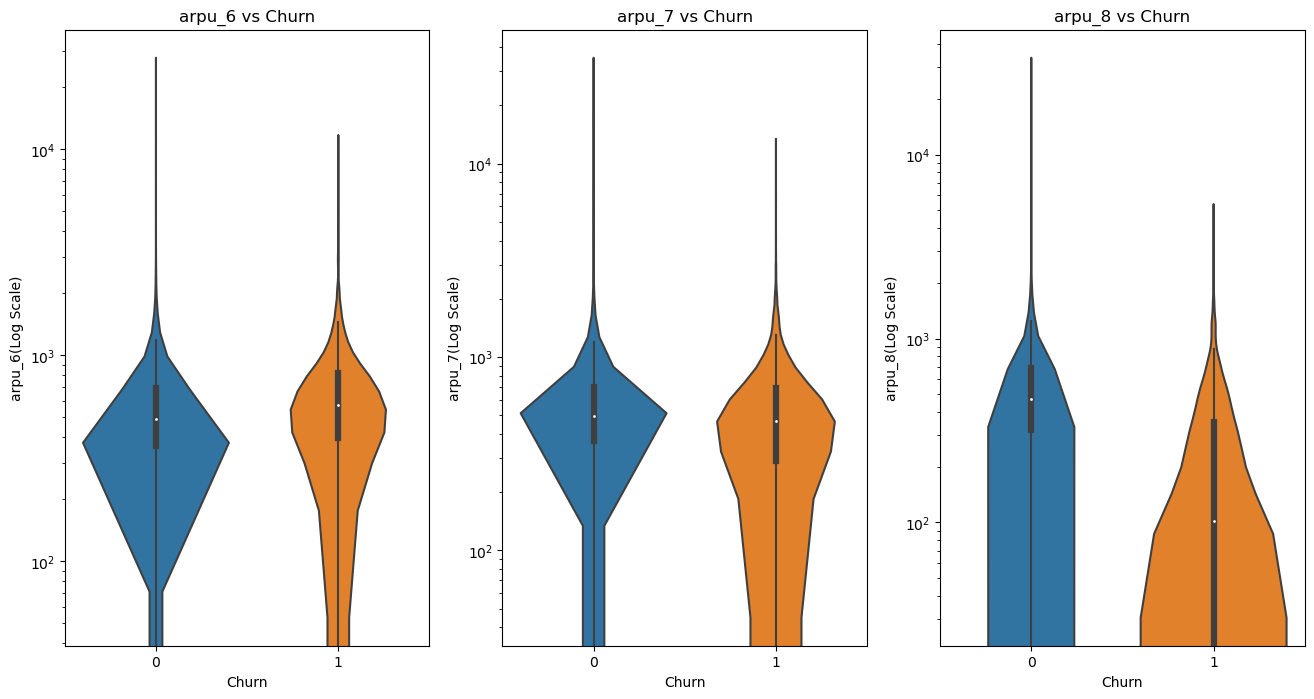

In [69]:
columns = ['arpu_6','arpu_7','arpu_8']
num_univariate_analysis(columns,'log')

From above figures we can understand that revenue generated by the customers who are about to churn is very unstable.
Those customers whose "arpu" decreases in 7th month are more likely to churn when compared to ones with increase in arpu.

Customers who churned (Churn : 1)
       total_og_mou_6  total_og_mou_7  total_og_mou_8
count     2593.000000     2593.000000     2593.000000
mean       867.961342      677.868909      225.083741
std        852.697688      786.961399      471.672718
min          0.000000        0.000000        0.000000
25%        277.880000      110.090000        0.000000
50%        658.360000      466.910000        0.000000
75%       1209.040000      926.760000      255.810000
max       8488.360000     8285.640000     5206.210000

Customers who did not churn (Churn : 0)
       total_og_mou_6  total_og_mou_7  total_og_mou_8
count    27418.000000    27418.000000    27418.000000
mean       669.554896      712.080684      661.480046
std        636.531612      674.580516      691.079113
min          0.000000        0.000000        0.000000
25%        265.682500      284.500000      227.970000
50%        500.410000      529.935000      470.475000
75%        872.070000      931.197500      866.045000
max    

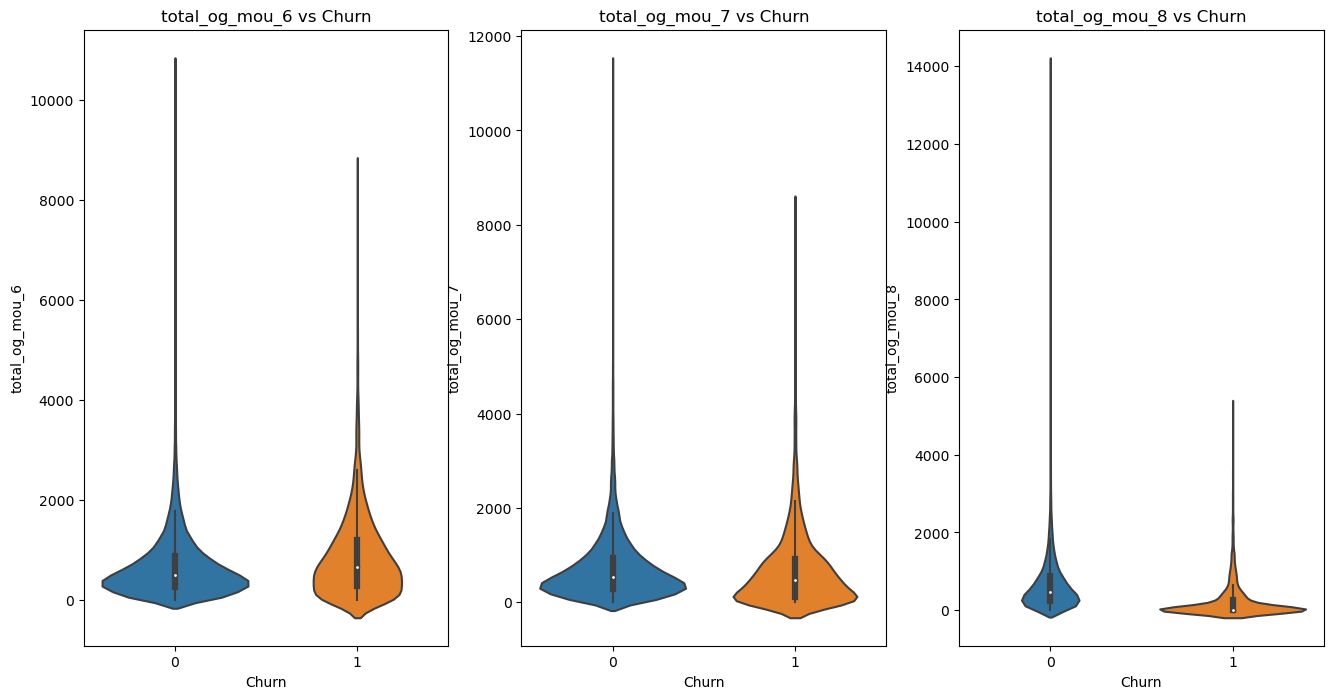

In [70]:
columns_tele = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
num_univariate_analysis(columns_tele)

Those customers who have high total_og_mou in 6th month and lower total_og_mou in 7th month are more likely to churn compared to the rest.

Customers who churned (Churn : 1)
       vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8
count  2593.000000  2593.000000  2593.000000
mean     60.775588    49.054393    15.283185
std     243.084276   219.485813   120.975111
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    4017.160000  3430.730000  3349.190000

Customers who did not churn (Churn : 0)
        vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8
count  27418.000000  27418.000000  27418.000000
mean      80.569210     80.925060     74.309036
std      280.420463    285.265125    277.889339
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%       16.937500     18.267500     14.245000
max    10285.900000   7873.550000  11117.610000 



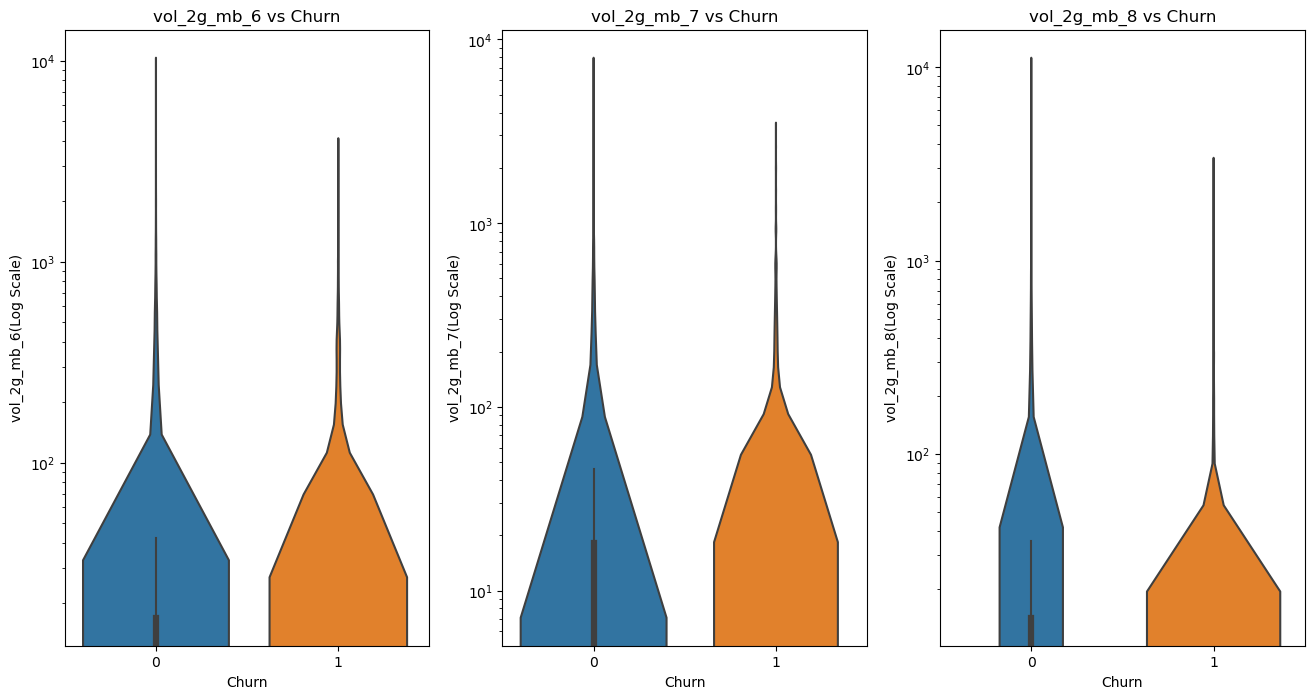

In [71]:
columns_tele = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']
num_univariate_analysis(columns_tele, 'log')

Customers who have stable usage of 2g volumes throughout 6 and 7 months are less likely to churn.
But the Customers with fall in consumption of 2g volumes in 7th month are more likely to churn.

Customers who churned (Churn : 1)
       vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  monthly_3g_6
count  2593.000000   2593.000000   2593.000000   2593.000000
mean    188.395461    157.714254     56.776880      0.134593
std     715.327843    690.773561    446.532769      0.495359
min       0.000000      0.000000      0.000000      0.000000
25%       0.000000      0.000000      0.000000      0.000000
50%       0.000000      0.000000      0.000000      0.000000
75%       0.000000      0.000000      0.000000      0.000000
max    9400.120000  15115.510000  13440.720000      6.000000

Customers who did not churn (Churn : 0)
        vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  monthly_3g_6
count  27418.000000  27418.000000  27418.000000  27418.000000
mean     265.012522    289.478375    290.016390      0.177621
std      878.846885    868.808831    885.821105      0.581065
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50% 

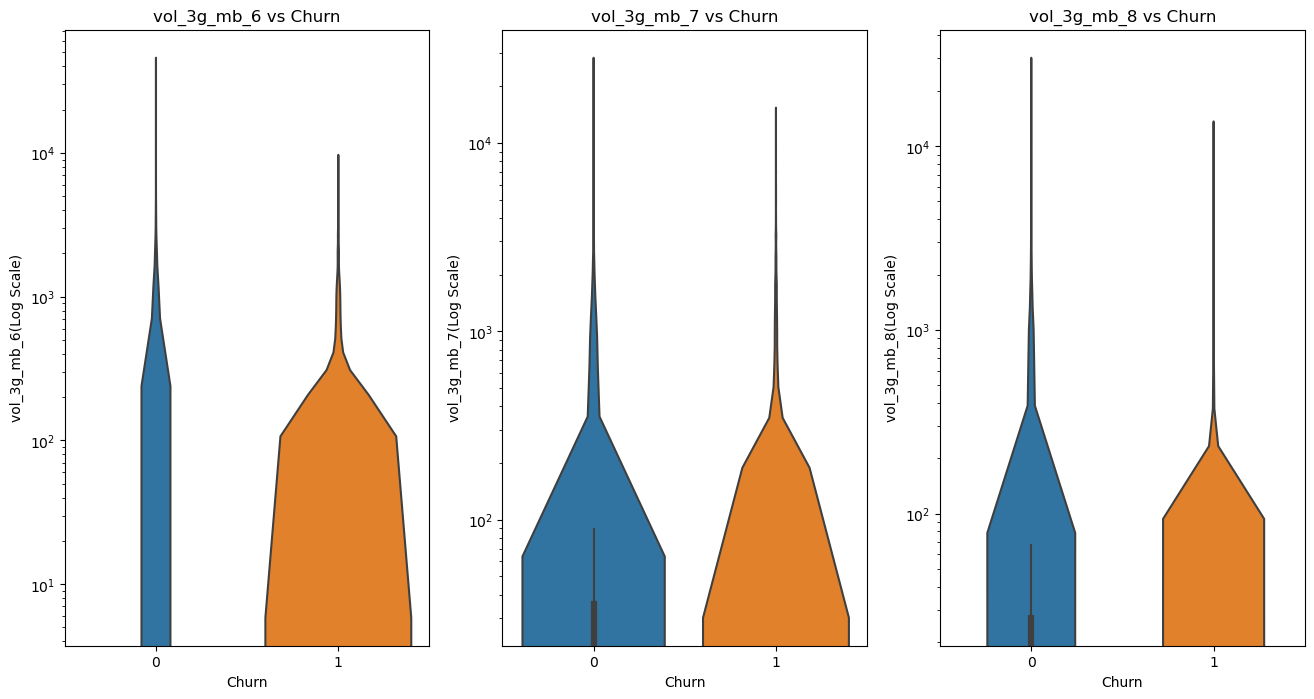

In [72]:
columns_tele = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_3g_6']
num_univariate_analysis(columns_tele, 'log')

Customers those who have stable usage of 3g volumes throughout 6 and 7 months are less likely to churn.
Customers those who fall in consumption of 3g volumes in 7th month churn more.

Customers who churned (Churn : 1)
+----+----------------+---------+------------+--------------------+----------------------+
|    |   monthly_2g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+------------+--------------------+----------------------|
|  0 |              0 |    2454 | 94.6394    |               2454 |              94.6394 |
|  1 |              1 |     126 |  4.85924   |               2580 |              99.4987 |
|  2 |              2 |      11 |  0.424219  |               2591 |              99.9229 |
|  3 |              4 |       2 |  0.0771307 |               2593 |             100      |
+----+----------------+---------+------------+--------------------+----------------------+ 

+----+----------------+---------+-----------+--------------------+----------------------+
|    |   monthly_2g_7 |   count |   percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+-----------+-----------

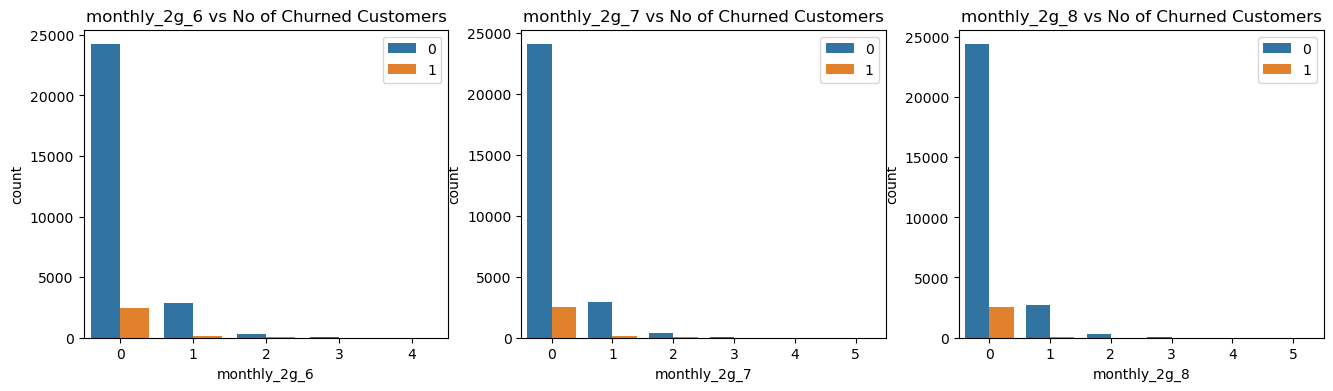

In [73]:
columns_tele = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
cat_univariate_analysis(columns_tele)

Customers who churned (Churn : 1)
+----+----------------+---------+------------+--------------------+----------------------+
|    |   monthly_3g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+------------+--------------------+----------------------|
|  0 |              0 |    2352 | 90.7057    |               2352 |              90.7057 |
|  1 |              1 |     170 |  6.55611   |               2522 |              97.2619 |
|  2 |              2 |      49 |  1.8897    |               2571 |              99.1516 |
|  3 |              3 |      13 |  0.50135   |               2584 |              99.6529 |
|  4 |              5 |       4 |  0.154261  |               2588 |              99.8072 |
|  5 |              4 |       4 |  0.154261  |               2592 |              99.9614 |
|  6 |              6 |       1 |  0.0385654 |               2593 |             100      |
+----+----------------+---------+------------+----------

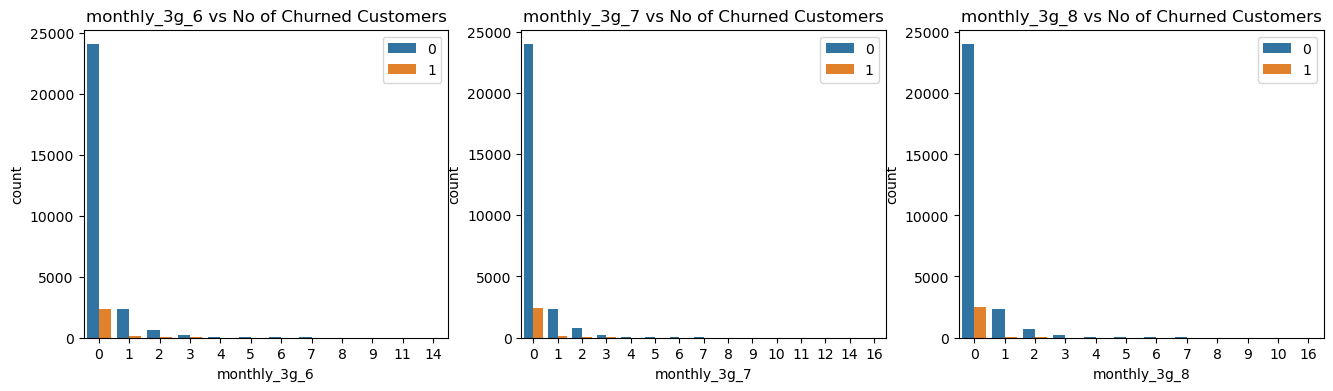

In [74]:
columns_tele = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
cat_univariate_analysis(columns_tele)

sachet_3g_6    category
sachet_3g_7    category
sachet_3g_8    category
dtype: object
Customers who churned (Churn : 1)
+----+---------------+---------+------------+--------------------+----------------------+
|    |   sachet_3g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+---------------+---------+------------+--------------------+----------------------|
|  0 |             0 |    2454 | 94.6394    |               2454 |              94.6394 |
|  1 |             1 |      87 |  3.35519   |               2541 |              97.9946 |
|  2 |             2 |      16 |  0.617046  |               2557 |              98.6116 |
|  3 |             4 |      11 |  0.424219  |               2568 |              99.0359 |
|  4 |             3 |       8 |  0.308523  |               2576 |              99.3444 |
|  5 |            10 |       4 |  0.154261  |               2580 |              99.4987 |
|  6 |             7 |       4 |  0.154261  |               2584 |    

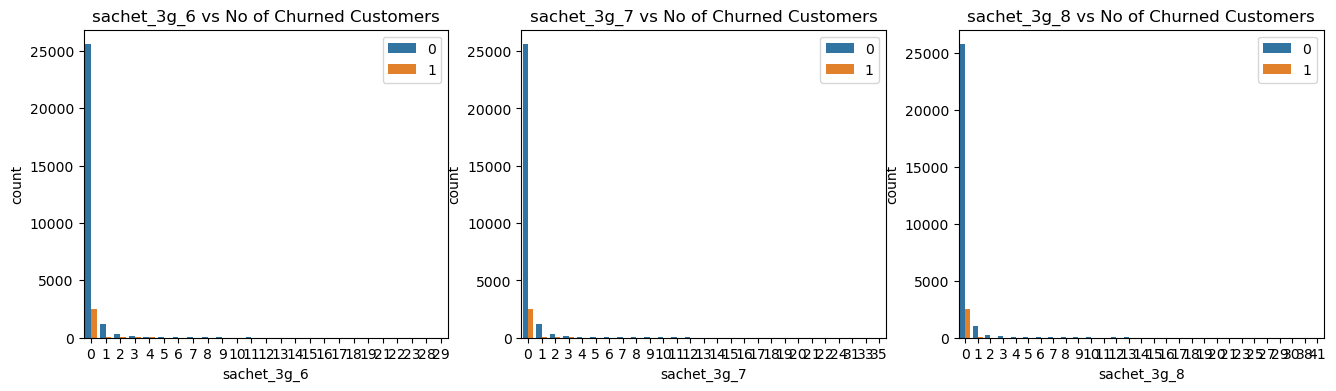

In [75]:
columns_tele = ['sachet_3g_6', 'sachet_3g_7','sachet_3g_8']
print(data_tele[columns_tele].dtypes)
cat_univariate_analysis(columns_tele)

Customers who churned (Churn : 1)
          vbc_3g_6     vbc_3g_7     vbc_3g_8
count  2593.000000  2593.000000  2593.000000
mean     81.564601    71.143880    32.610659
std     320.898511   284.882601   197.998246
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    6931.810000  4908.270000  5738.740000

Customers who did not churn (Churn : 0)
           vbc_3g_6      vbc_3g_7      vbc_3g_8
count  27418.000000  27418.000000  27418.000000
mean     125.124167    141.178182    138.597023
std      395.413666    417.292310    402.761779
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      9.940000     17.675000
max    11166.210000   9165.600000  12916.220000 



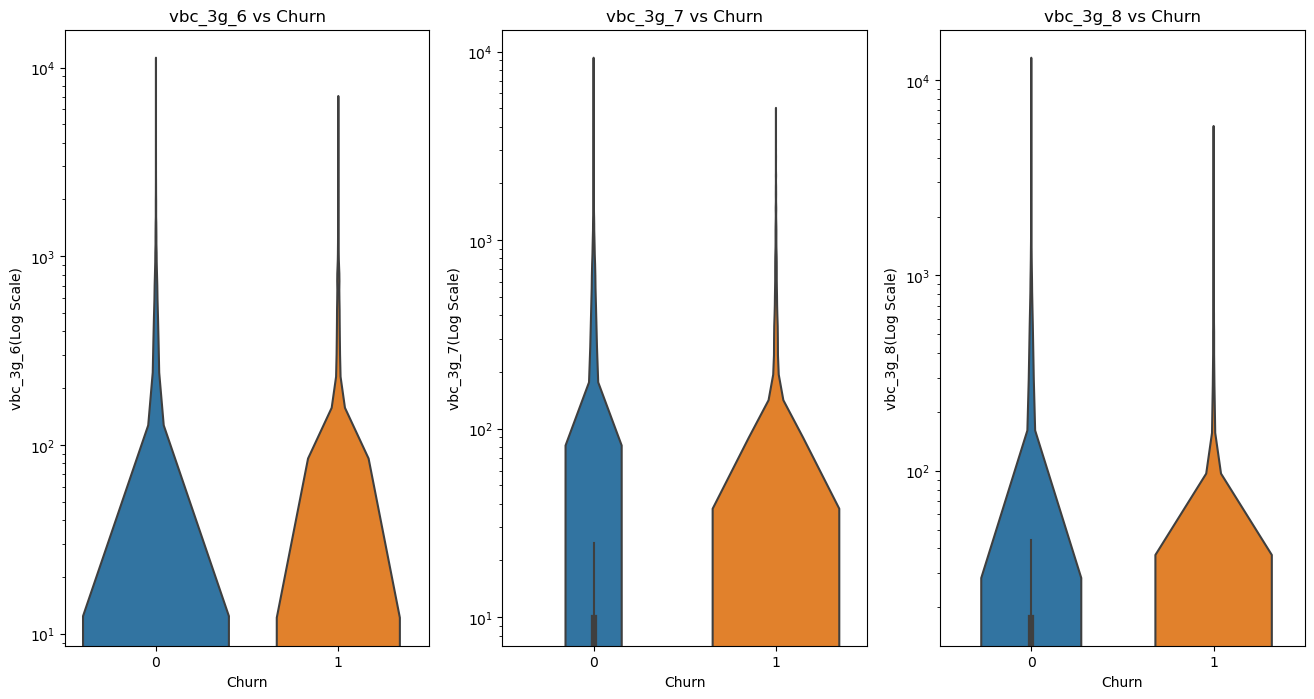

In [76]:
columns_tele = [ 'vbc_3g_6', 'vbc_3g_7','vbc_3g_8']
num_univariate_analysis(columns_tele, 'log')

# Bivariate Analysis

In [77]:
data_tele.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
7000875565,430.975,299.869,187.894,50.51,74.01,7

<Axes: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

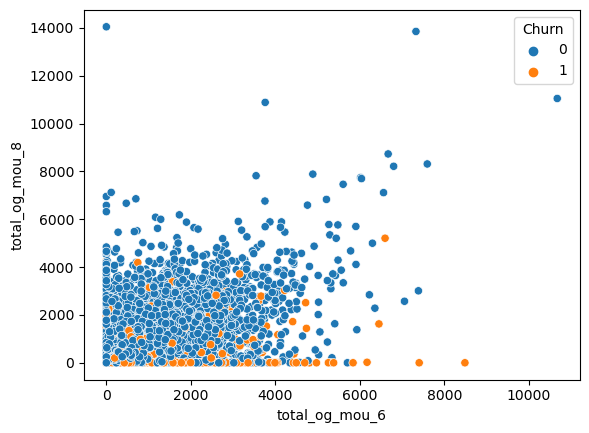

In [78]:
sns.scatterplot(x=data_tele['total_og_mou_6'],y=data_tele['total_og_mou_8'],hue=data_tele['Churn'])

<Axes: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

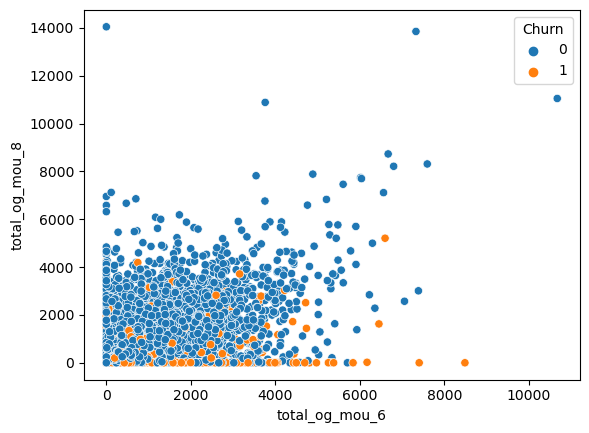

In [79]:
sns.scatterplot(x=data_tele['total_og_mou_6'],y=data_tele['total_og_mou_8'],hue=data_tele['Churn'])

<Axes: xlabel='aon', ylabel='total_og_mou_8'>

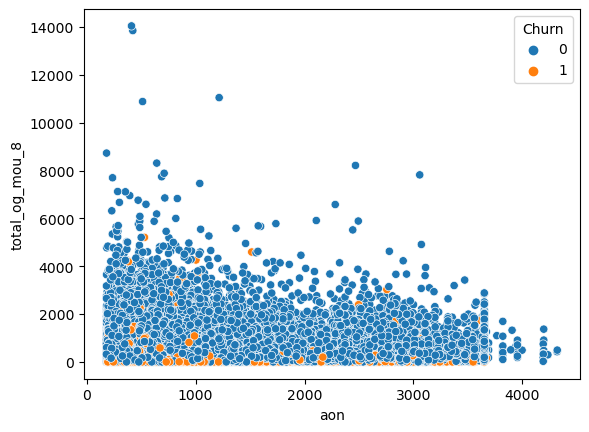

In [80]:
sns.scatterplot(x=data_tele['aon'],y=data_tele['total_og_mou_8'],hue=data_tele['Churn'])

<Axes: xlabel='aon', ylabel='total_ic_mou_8'>

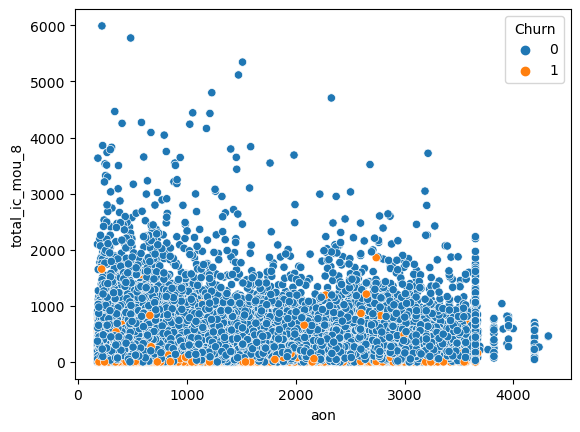

In [81]:
sns.scatterplot(x=data_tele['aon'],y=data_tele['total_ic_mou_8'],hue=data_tele['Churn'])

Those customers who have less total_ic_mou_8 are more likely to churn irrespective of aon.And the customers who have total_ic_mou_8 > 2000 are very less likely to churn.

<Axes: xlabel='max_rech_amt_6', ylabel='max_rech_amt_8'>

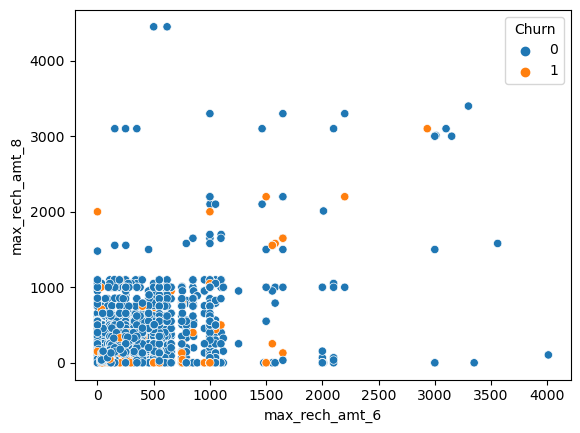

In [82]:
sns.scatterplot(x=data_tele['max_rech_amt_6'],y=data_tele['max_rech_amt_8'],hue=data_tele['Churn'])

### Correlation Analysis

In [83]:
def correlation(dataframe) : 
    
    columnsForAnalysis = set(dataframe.columns.values) - {'Churn'}
    cor0=dataframe[columnsForAnalysis].corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]

    # removing duplicate correlations
    cor0['pair'] = cor0[['VAR1', 'VAR2']].apply(lambda x: '{}-{}'.format(*sorted((x[0], x[1]))), axis=1)
    
    cor0 = cor0.drop_duplicates(subset=['pair'], keep='first')
    cor0 = cor0[['VAR1', 'VAR2','CORR']]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

# Data Preparation

### Derived Variables

In [84]:
data_tele['delta_vol_2g'] = data_tele['vol_2g_mb_8'] - data_tele['vol_2g_mb_6'].add(data_tele['vol_2g_mb_7']).div(2)
data_tele['delta_vol_3g'] = data_tele['vol_3g_mb_8'] - data_tele['vol_3g_mb_6'].add(data_tele['vol_3g_mb_7']).div(2)
data_tele['delta_total_og_mou'] = data_tele['total_og_mou_8'] - data_tele['total_og_mou_6'].add(data_tele['total_og_mou_7']).div(2)
data_tele['delta_total_ic_mou'] = data_tele['total_ic_mou_8'] - data_tele['total_ic_mou_6'].add(data_tele['total_ic_mou_7']).div(2)
data_tele['delta_vbc_3g'] = data_tele['vbc_3g_8'] - data_tele['vbc_3g_6'].add(data_tele['vbc_3g_7']).div(2)

In [85]:
# Revenue 
data_tele['delta_arpu'] = data_tele['arpu_8'] - data_tele['arpu_6'].add(data_tele['arpu_7']).div(2)
data_tele['delta_total_rech_amt'] = data_tele['total_rech_amt_8'] - data_tele['total_rech_amt_6'].add(data_tele['total_rech_amt_7']).div(2)

In [86]:
data_tele.drop(columns=[
 'vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
  'vol_3g_mb_8'  , 'vol_3g_mb_6', 'vol_3g_mb_7' ,
    'total_og_mou_8','total_og_mou_6', 'total_og_mou_7', 
    'total_ic_mou_8','total_ic_mou_6', 'total_ic_mou_7',
    'vbc_3g_8','vbc_3g_6','vbc_3g_7',
    'arpu_8','arpu_6','arpu_7',
    'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'
    
], inplace=True)

# Outlier Treatment

In [87]:
data_tele.quantile(np.arange(0.9,1.01,0.01)).style.bar()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.900000,794.980000,824.380000,723.610000,915.580000,935.690000,853.790000,32.730000,18.360000,18.680000,64.480000,41.200000,37.110000,207.930000,207.840000,196.910000,435.160000,437.490000,416.660000,18.380000,18.660000,16.960000,4.040000,4.840000,4.450000,661.740000,657.380000,633.340000,630.530000,663.790000,567.340000,604.410000,645.880000,531.260000,2.200000,2.180000,1.730000,1140.930000,1177.180000,1057.290000,0.000000,0.000000,0.000000,15.930000,19.510000,18.040000,2.260000,0.000000,0.000000,154.880000,156.610000,148.140000,368.540000,364.540000,360.540000,39.230000,41.040000,37.190000,559.280000,558.990000,549.790000,34.730000,36.010000,32.140000,73.380000,75.280000,68.580000,4.360000,4.580000,3.940000,115.910000,118.660000,108.380000,0.280000,0.000000,0.000000,15.010000,18.300000,15.330000,1.160000,1.590000,1.230000,23.000000,23.000000,21.000000,297.000000,300.000000,252.000000,250.000000,250.000000,225.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2846.000000,1118.000000,29.835000,170.075000,345.070000,147.300000,69.830000,257.309500,319.000000
0.910000,848.967000,878.352000,783.488000,966.740000,984.020000,899.286000,39.692000,23.281000,23.392000,78.431000,50.012000,46.435000,225.963000,224.873000,213.831000,461.095000,461.812000,441.836000,20.281000,20.680000,18.840000,4.680000,5.512000,5.112000,703.112000,692.668000,669.633000,686.255000,722.843000,622.128000,658.472000,695.767000,583.424000,2.910000,2.800000,2.280000,1195.610000,1244.396000,1125.276000,0.000000,0.000000,0.000000,17.540000,21.283000,19.692000,2.540000,0.000000,0.000000,165.792000,168.033000,159.838000,390.636000,387.112000,382.199000,43.590000,45.392000,41.212000,593.133000,589.645000,580.535000,38.212000,39.912000,35.930000,80.412000,81.931000,75.542000,5.210000,5.491000,4.710000,125.981000,129.288000,118.240000,0.300000,0.000000,0.000000,18.341000,21.841000,18.831000,1.440000,1.940000,1.510000,24.000000,24.000000,22.000000,325.000000,330.000000,289.000000,250.000000,250.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2910.100000,1156.000000,39.883000,227.151000,377.460500,161.801000,95.325000,278.900400,345.500000
0.920000,909.054000,941.990000,848.964000,1031.390000,1038.090000,953.354000,48.710000,29.680000,29.644000,93.598000,60.966000,57.594000,247.944000,244.780000,232.330000,490.630000,488.036000,468.830000,22.560000,23.144000,20.930000,5.450000,6.260000,5.864

In [88]:
data_change_99 = data_tele.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
outlier_condition = data_change_99 > 100
columns_outliers = data_change_99[outlier_condition].index.values
print('Columns with outliers :\n', columns_outliers)

Columns with outliers :
 ['onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'offnet_mou_6' 'offnet_mou_7'
 'offnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'loc_og_t2t_mou_6'
 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_6'
 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2c_mou_6'
 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'
 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8' 'std_og_mou_6'
 'std_og_mou_7' 'std_og_mou_8' 'isd_og_mou_6' 'isd_og_mou_7'
 'isd_og_mou_8' 'spl_og_mou_6' 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6'
 'og_others_7' 'og_others_8' 'loc_ic_t2t_mou_6' 'loc_ic_t2t_mou_7'
 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6' 'loc_ic_t2m_mou_7'
 'loc_ic_t2m_mou_8' 'loc_ic_t2f_mou_6' 'loc_ic_t2f_mou_7'
 'lo

In [89]:
treatment_of_outliers = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in columns_outliers : 
    outlier_threshold = data_tele[col].quantile(0.99)
    condition = data_tele[col] > outlier_threshold
    treatment_of_outliers = treatment_of_outliers.append({'Column' : col , 'Outlier Threshold' : outlier_threshold, 'Outliers replaced' : data_tele.loc[condition,col].shape[0] }, ignore_index=True)
    data_tele.loc[condition, col] = outlier_threshold
treatment_of_outliers

,Column,Outlier Threshold,Outliers replaced
0,onnet_mou_6,2166.37000,301
1,onnet_mou_7,2220.36700,301
2,onnet_mou_8,2188.50400,301
3,offnet_mou_6,2326.29000,301
4,offnet_mou_7,2410.10400,301
5,offnet_mou_8,2211.64200,301
6,roam_ic_mou_6,349.35300,301
7,roam_ic_mou_7,292.54000,301
8,roam_ic_mou_8,288.48500,301
9,roam_og_mou_6,543.70900,301


In [90]:
categorical_value = data_tele.dtypes == 'category'
categorical_variable = data_tele.columns[categorical_value].to_list()
ind_categorical_variable = set(categorical_variable) - {'Churn'}
ind_categorical_variable

{'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'}

In [91]:
for col in ind_categorical_variable : 
    categorical_counts = 100*data_tele[col].value_counts(normalize=True)
    print('\n',tabulate(pd.DataFrame(categorical_counts), headers='keys', tablefmt='psql'),'\n')
    low_count_category = categorical_counts[categorical_counts <= 1].index.to_list()
    print(f"Replaced {low_count_category} in {col} with category : Others")
    data_tele[col].replace(low_count_category,'Others',inplace=True)


 +----+---------------+
|    |   sachet_3g_6 |
|----+---------------|
|  0 |   93.4091     |
|  1 |    4.35507    |
|  2 |    1.04295    |
|  3 |    0.396521   |
|  4 |    0.219919   |
|  5 |    0.123288   |
|  6 |    0.089967   |
|  7 |    0.0866349  |
|  8 |    0.0499817  |
|  9 |    0.0499817  |
| 10 |    0.0366532  |
| 11 |    0.0266569  |
| 15 |    0.0166606  |
| 19 |    0.0133284  |
| 12 |    0.0133284  |
| 14 |    0.00999633 |
| 18 |    0.00999633 |
| 13 |    0.00999633 |
| 23 |    0.00999633 |
| 16 |    0.00666422 |
| 22 |    0.00666422 |
| 29 |    0.00666422 |
| 17 |    0.00333211 |
| 21 |    0.00333211 |
| 28 |    0.00333211 |
+----+---------------+ 

Replaced [3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 19, 12, 14, 18, 13, 23, 16, 22, 29, 17, 21, 28] in sachet_3g_6 with category : Others

 +----+---------------+
|    |   sachet_2g_6 |
|----+---------------|
|  0 |   82.5631     |
|  1 |    7.87378    |
|  2 |    3.3621     |
|  3 |    2.0126     |
|  4 |    1.32951    |
|  5 |    0.70

In [92]:
dummy_variable = pd.get_dummies(data_tele[ind_categorical_variable], drop_first=False, prefix=ind_categorical_variable, prefix_sep='_')
dummy_variable.head()

,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_6_Others,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_Others,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_7_Others,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_8_Others,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_Others,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_Others
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
7001524846,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7002191713,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
7000875565,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
7000187447,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [93]:
reference_column = dummy_variable.filter(regex='.*Others$').columns.to_list() 
dummy_variable.drop(columns=reference_column, inplace=True)
reference_column

['sachet_3g_6_Others',
 'sachet_2g_6_Others',
 'sachet_3g_7_Others',
 'sachet_3g_8_Others',
 'sachet_2g_8_Others',
 'sachet_2g_7_Others']

In [94]:
data_tele.drop(columns=ind_categorical_variable, inplace=True)
data_tele = pd.concat([data_tele, dummy_variable], axis=1)
data_tele.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,Churn,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_8_0,sachet_3g_8_1,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.590,15.740,15.19,15.14,5,5,7,1000,790,951,0,0,619,0,0,0,0,0,0,802,1185.0,1,0.00,0.000,-198.225,-163.510,38.680,864.34085,1036.4,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
7001524846,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,19,21,14,90,154,30,50,0,10,0,1,0,0,0,0,315,519.0,0,-177.97,-363.535,-298.450,-49.635,-495.375,-298.11000,-399.0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
7002191713,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,0.45,0.0,0.0,239.60,62.11,249.888,20.708,16.24,21.44,6,4,11,110,110,130,110,50,0,0,0,0,0,0,0,2607,380.0,0,0.02,0.000,465.510,573.935,0.000,244.00150,337.0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
7000875565,50

In [95]:
dummy_column = dummy_variable.columns.to_list()
data_tele[dummy_column] = data_tele[dummy_column].astype('category')

In [96]:
data_tele.shape

(30011, 131)

# Train-Test Split

In [98]:
y_1 = data_tele.pop('Churn') # Predicted / Target Variable
X_1 = data_tele # Predictor variables

In [99]:
from sklearn.model_selection import train_test_split
X_train1, X_test2, y_train1, y_test2 = train_test_split(X_1,y_1, train_size=0.7, random_state=42)

In [100]:
y_1.value_counts(normalize=True).to_frame()

,Churn
0,0.913598
1,0.086402


In [102]:
class_0 = y_1[y_1 == 0].count()
class_1 = y_1[y_1 == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.095


In [103]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd 

# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed_1 = imputer.fit_transform(X_train1)

# Convert the NumPy array back to a Pandas DataFrame
X_train_imputed_df_1 = pd.DataFrame(X_train_imputed_1, columns=X_train1.columns)

# Step 2: Encode categorical variables (if any)
label_encoder = LabelEncoder()
X_train_encoded = X_train_imputed_df_1.apply(lambda col: label_encoder.fit_transform(col.astype(str)))

# Step 3: Apply SMOTE on the preprocessed data
smt = SMOTE(random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train_encoded, y_train1)

In [104]:
X_train_resampled.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_8_0,sachet_3g_8_1,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5
0,10285,10139,7651,8019,4525,13474,0,0,0,0,0,0,6432,6447,4941,6051,2922,8495,1351,584,698,0,0,0,8251,5258,239,0,0,0,0,3329,0,458,861,804,4246,10045,7212,0,0,0,0,0,0,0,0,0,2294,4986,551,6398,3734,11552,2950,94,184,7409,5282,544,0,0,0,53,0,0,1184,122,575,5245,122,2029,0,0,0,0,0,2404,0,0,0,45,44,34,32,31,38,7,12,16,1,1,1,0,0,0,421,1508,4690,3899,3862,2527,5926,2996,379,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1,13806,5092,2687,11864,7689,10108,0,0,0,0,0,0,5472,5058,3900,7797,7648,10021,0,0,0,0,0,45,13524,13190,13629,6537,2582,1016,7194,4563,5433,0,0,0,9230,8273,8100,70,0,368,0,0,468,0,0,0,344,4184,4371,2439,2110,5081,0,58,0,5886,3568,6325,2206,1254,37,4144,577,2500,0,0,0,187,1372,3865,46,0,20,811,1040,2348,18,45,82,47,3,4,7,13,13,0,12,0,0,0,0,0,0,0,879,1450,5163,3730,15681,12057,3474,18336,1985,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
2,831,2330,28,58,0,0,0,0,0,0,0,0,605,1495,29,104,0,0,0,0,0,0,0,0,1620,2008,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2713,2721,7780,7625,4322,3212,2675,55,111,12021,9455,1005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44,23,34,47,44,56,46,0,56,0,0,0,2,1,2,1942,1348,3540,2584,1512,18304,3474,19797,2193,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
3,10347,10333,11672,11592,14446,9215,0,0,0,0,0,0,3598,2730,4955,8472,9295,7762,94,1582,0,0,0,0,12567,13101,12905,6532,6604,7364,8429,2898,0,0,108,0,9214,9355,10327,0,0,0,0,0,0,0,0,0,2487,3821,2617,10679,12408,10420,2759,3217,2673,1918,3921,1899,1022,687,102,86,1760,4045,0,829,771,2000,3940,444,0,0,0,0,1878,2154,0,0,0,2,5,4,14,17,17,0,17,0,0,0,0,1,1,2,128,1584,372,213,14290,6715,3474,14979,2317,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1546,515,2586,7666,5089,6409,0,0,0,0,0,0,1035,416,1690,6511,3640,5200,0,51,38,0,0,0,9372,6806,8765,0,0,0,84,2133,7742,0,68,0,86,3161,9378,0,0,0,0,0,0,0,0,0,3109,2595,3094,8386,8031,7240,3517,3672,3516,12948,12563,12112,0,0,84,4821,3735,56,237,1296,189,2004,522,694,0,0,0,29,0,32,0,0,0,44,44,34,59,20,27,59,20,29,1,2,0,0,0,2,1456,1984,8024,3114,17104,5736,2300,9528,53,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,

In [105]:
# columns with numerical data
condition1 = data_tele.dtypes == 'int'
condition2 = data_tele.dtypes == 'float'
numerical_vars = data_tele.columns[condition1 | condition2].to_list()
# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

In [106]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Fit and transform train set 
X_train_resampled[numerical_vars] = scaler.fit_transform(X_train_resampled[numerical_vars])

# Transform test set
X_test2[numerical_vars] = scaler.transform(X_test2[numerical_vars])

In [107]:
round(X_train_resampled.describe(),2)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_8_0,sachet_3g_8_1,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5
count,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.0,38374.0,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.0,0.0,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,23.97,24.94,22.21,35.57,31.88,37.06,32.19,30.30,27.12,0.07,0.07,0.06,0.11,0.11,0.10,1923.14,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.92,0.02,0.01,0.78,0.05,0.02,0.01,0.01,0.92,0.02,0.01,0.95,0.02,0.81,0.05,0.02,0.01,0.01,0.01,0.79,0.04,0.02,0.01,0.01,0.01
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00

### Modelling

Baseline Logistic Regression Model

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Assuming you have X_train and y_train, you can split your data into training and testing sets
X_train1, X_test2, y_train1, y_test2 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed_1 = imputer.fit_transform(X_train1)
X_test_imputed_2 = imputer.transform(X_test2)  # Apply the same imputer to the test set

# Step 2: Fit Logistic Regression
baseline_model = LogisticRegression(random_state=100, class_weight='balanced')
baseline_model.fit(X_train_imputed_1, y_train1)

# Step 3: Predict probabilities
y_train_pred = baseline_model.predict_proba(X_train_imputed_1)[:, 1]
y_test_pred = baseline_model.predict_proba(X_test_imputed_2)[:, 1]

In [109]:
y_train_pred = pd.Series(y_train_pred,index = X_train1.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test2.index)

In [110]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [111]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [113]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train1, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test2, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[18286  3656]
 [  369  1697]]

Confusion Matrix for test: 
 [[4574  902]
 [  93  434]]


In [114]:
print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.832
Sensitivity / True Positive Rate / Recall : 0.821
Specificity / True Negative Rate :  0.833
Precision / Positive Predictive Value : 0.317
F1-score : 0.457


Test Performance : 

Accuracy : 0.834
Sensitivity / True Positive Rate / Recall : 0.824
Specificity / True Negative Rate :  0.835
Precision / Positive Predictive Value : 0.325
F1-score : 0.466


In [116]:
y_train_pred_thres = pd.DataFrame(index=X_train1.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
mobile_number,,,,,,,,,,
7000224828,1,1,1,1,1,1,1,1,1,0
7002182249,1,1,1,1,0,0,0,0,0,0
7001976501,1,1,1,1,1,1,1,1,1,0
7001690852,1,1,1,0,0,0,0,0,0,0
7000587426,1,1,1,1,1,0,0,0,0,0


In [117]:
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train1, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    metrics_df =  metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
metrics_df.index = thresholds
metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.086
0.1,0.977,0.338,0.393
0.2,0.946,0.520,0.557
0.3,0.907,0.659,0.680
0.4,0.864,0.760,0.769
0.5,0.821,0.833,0.832
0.6,0.766,0.883,0.873
0.7,0.671,0.920,0.898
0.8,0.487,0.953,0.913
0.9,0.239,0.981,0.917


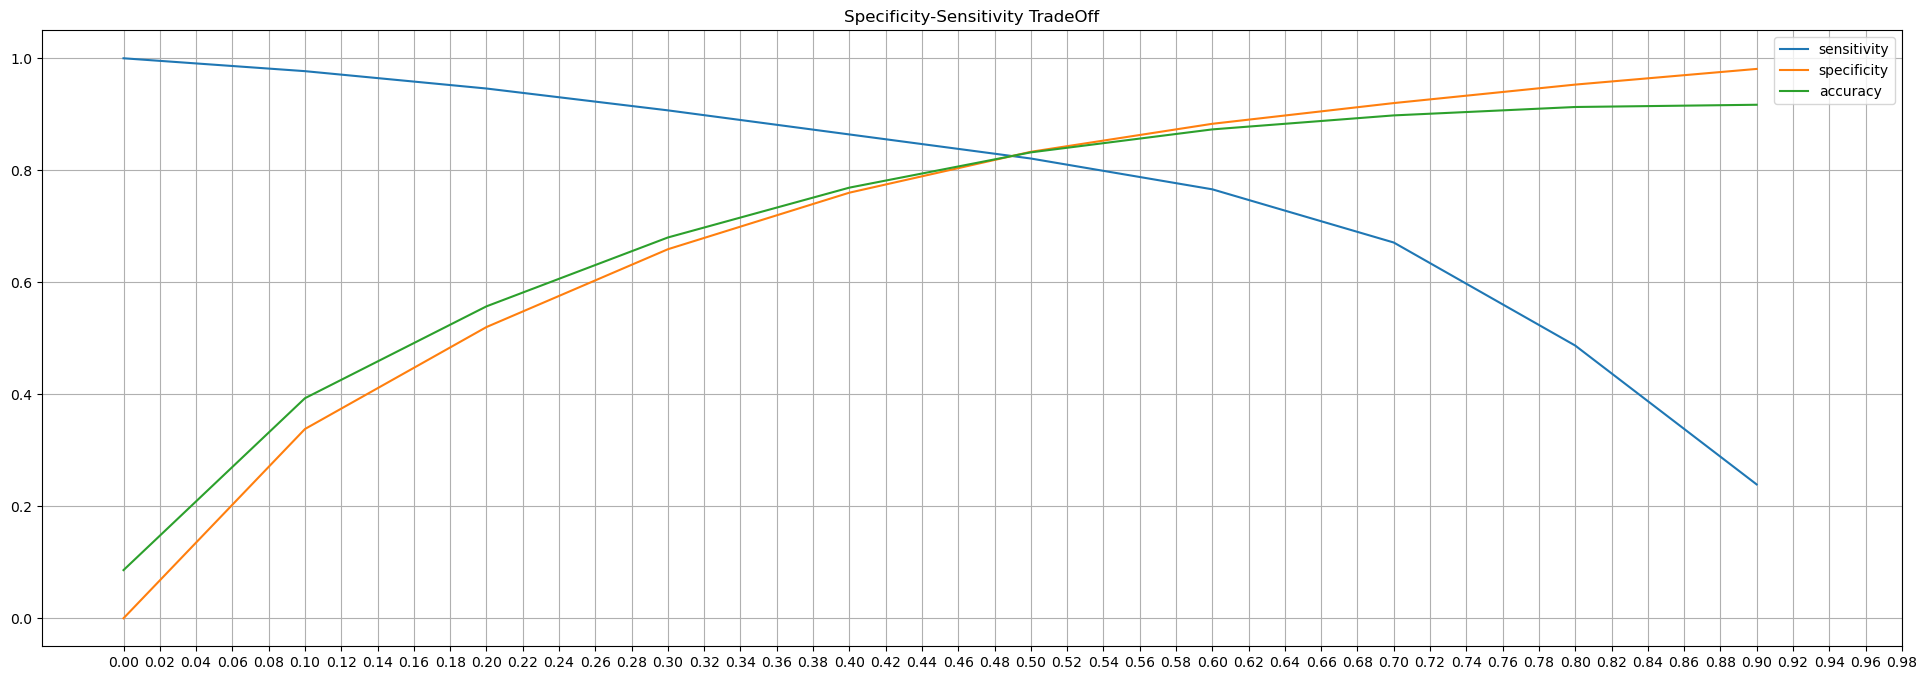

In [118]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');


In [119]:
optimum_cutoff = 0.49
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train1, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test2, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[18167  3775]
 [  362  1704]]

Confusion Matrix for test: 
 [[4541  935]
 [  92  435]]


In [120]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.828
Sensitivity / True Positive Rate / Recall : 0.825
Specificity / True Negative Rate :  0.828
Precision / Positive Predictive Value : 0.311
F1-score : 0.452


Test Performance : 

Accuracy : 0.829
Sensitivity / True Positive Rate / Recall : 0.825
Specificity / True Negative Rate :  0.829
Precision / Positive Predictive Value : 0.318
F1-score : 0.459


In [121]:
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train1, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test2, y_test_pred),3) )

ROC AUC score for Train :  0.889 

ROC AUC score for Test :  0.875


In [122]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming you have X and y defined or loaded

# Split your data into training and testing sets
X_train1, X_test2, y_train1, y_test2 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [123]:
# Create a logistic regression model
lr = LogisticRegression(random_state=100, class_weight='balanced')

# Create RFE model
rfe = RFE(lr, n_features_to_select=15)
results = rfe.fit(X_train1, y_train1)

# Display the selected features
selected_features = results.support_
print("Selected Features:", selected_features)
X_train1 = X_train1.dropna()
y_train1 = y_train1[X_train1.index]

Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False  True False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False  True False False False
 False False False False False False False False False  True False  True
 False False False False False False  True  True  True False False  True
 False False False False False False False False False  True False False
  True False False False False False False False  True False  True False
 False False False False  True False False False False False]


In [125]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X_1.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

,Column,Rank,Support
90,monthly_2g_6,1,True
92,monthly_2g_8,1,True
40,isd_og_mou_7,1,True
124,sachet_2g_7_0,1,True
68,std_ic_t2f_mou_8,1,True
56,loc_ic_t2f_mou_8,1,True
118,sachet_2g_8_0,1,True
95,monthly_3g_8,1,True
81,total_rech_num_6,1,True
116,sachet_3g_8_0,1,True


In [126]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['monthly_2g_6',
 'monthly_2g_8',
 'isd_og_mou_7',
 'sachet_2g_7_0',
 'std_ic_t2f_mou_8',
 'loc_ic_t2f_mou_8',
 'sachet_2g_8_0',
 'monthly_3g_8',
 'total_rech_num_6',
 'sachet_3g_8_0',
 'total_rech_num_8',
 'monthly_2g_7',
 'sachet_2g_6_0',
 'std_og_t2f_mou_8',
 'sachet_3g_6_0']

# Model - 1

In [127]:
import statsmodels.api as sm 

# Note that the SMOTE resampled Train set is used with statsmodels.api.GLM since it doesnot support class_weight
logr = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38358
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20549.
Date:                Sun, 10 Mar 2024   Deviance:                       41098.
Time:                        14:56:22   Pearson chi2:                 4.81e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2704
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5501      0.068      8.107      0.000       0.417       0.683
monthly_2g_6        -0.8029      0.081     -9.906      0.000      -0.962      -0.644
monthly_2g_8        -3.3972      0.204    -16.691      0.000      -3.796      -2.998
isd_og_mou_7         0.1072      0.013      8.436      0.000       0.082       0.132
sachet_2g_7_0       -0.2662      0.038     -7.022      0.000      -0.340      -0.192
std_ic_t2f_mou_8    -0.2933      0.017    -17.368      0.000      -0.326      -0.260
loc_ic_t2f_mou_8    -0.7297      0.015    -48.329      0.000      -0.759      -0.700
sachet_2g_8_0        0.5590      0.036     15.659      0.000       0.489       0.629
monthly_3g_8        -1.9501      0.074    -26.529      0.000      -2.094      -1.806
total_rech_num_6    -0.0087      0.001    -11.903      0.000      -0.010      -0.007
sachet_3g_8_0        0.7483      0.065     11.453      0.000       0.620       0.876
total_rech_num_8    -0.0087      0.001    -11.292      0.000      -0.010      -0.007
monthly_2g_7        -0.9908      0.084    -11.728      0.000      -1.156      -0.825
sachet_2g_6_0       -0.5376      0.037    -14.482      0.000      -0.610      -0.465
std_og_t2f_mou_8    -0.1565      0.016     -9.882      0.000      -0.188      -0.125
sachet_3g_6_0       -0.5497      0.053    -10.318      0.000      -0.654      -0.445
====================================================================================
"""

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train_resampled, logr_fit, selected_columns) : 
    vif = pd.DataFrame()
    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(X_train_resampled[selected_columns].values, i) for i in range(X_train_resampled[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ["VIF",'P-value'], ascending = [False,False])
    return vif

vif(X_train_resampled, logr_fit, rfe_selected_columns)

,VIF,P-value
Features,,
sachet_3g_8_0,16.77,0.0
sachet_3g_6_0,13.61,0.0
sachet_2g_7_0,7.51,0.0
sachet_2g_6_0,7.16,0.0
sachet_2g_8_0,7.02,0.0
total_rech_num_6,3.03,0.0
total_rech_num_8,2.89,0.0
monthly_2g_7,1.82,0.0
monthly_2g_8,1.73,0.0


'monthly_2g_7_0' has the very p-value, so it will be eliminated

In [129]:
selected_columns = rfe_selected_columns

# Check if the element is in the list before removing it
element_to_remove = 'monthly_2g_7_0'
if element_to_remove in selected_columns:
    selected_columns.remove(element_to_remove)
else:
    print(f"{element_to_remove} not found in the list")

print(selected_columns)

monthly_2g_7_0 not found in the list
['monthly_2g_6', 'monthly_2g_8', 'isd_og_mou_7', 'sachet_2g_7_0', 'std_ic_t2f_mou_8', 'loc_ic_t2f_mou_8', 'sachet_2g_8_0', 'monthly_3g_8', 'total_rech_num_6', 'sachet_3g_8_0', 'total_rech_num_8', 'monthly_2g_7', 'sachet_2g_6_0', 'std_og_t2f_mou_8', 'sachet_3g_6_0']


# Model-2

In [130]:
logr2 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38358
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20549.
Date:                Sun, 10 Mar 2024   Deviance:                       41098.
Time:                        14:57:02   Pearson chi2:                 4.81e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2704
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5501      0.068      8.107      0.000       0.417       0.683
monthly_2g_6        -0.8029      0.081     -9.906      0.000      -0.962      -0.644
monthly_2g_8        -3.3972      0.204    -16.691      0.000      -3.796      -2.998
isd_og_mou_7         0.1072      0.013      8.436      0.000       0.082       0.132
sachet_2g_7_0       -0.2662      0.038     -7.022      0.000      -0.340      -0.192
std_ic_t2f_mou_8    -0.2933      0.017    -17.368      0.000      -0.326      -0.260
loc_ic_t2f_mou_8    -0.7297      0.015    -48.329      0.000      -0.759      -0.700
sachet_2g_8_0        0.5590      0.036     15.659      0.000       0.489       0.629
monthly_3g_8        -1.9501      0.074    -26.529      0.000      -2.094      -1.806
total_rech_num_6    -0.0087      0.001    -11.903      0.000      -0.010      -0.007
sachet_3g_8_0        0.7483      0.065     11.453      0.000       0.620       0.876
total_rech_num_8    -0.0087      0.001    -11.292      0.000      -0.010      -0.007
monthly_2g_7        -0.9908      0.084    -11.728      0.000      -1.156      -0.825
sachet_2g_6_0       -0.5376      0.037    -14.482      0.000      -0.610      -0.465
std_og_t2f_mou_8    -0.1565      0.016     -9.882      0.000      -0.188      -0.125
sachet_3g_6_0       -0.5497      0.053    -10.318      0.000      -0.654      -0.445
====================================================================================
"""

In [131]:
vif(X_train_resampled, logr2_fit, selected_columns)

,VIF,P-value
Features,,
sachet_3g_8_0,16.77,0.0
sachet_3g_6_0,13.61,0.0
sachet_2g_7_0,7.51,0.0
sachet_2g_6_0,7.16,0.0
sachet_2g_8_0,7.02,0.0
total_rech_num_6,3.03,0.0
total_rech_num_8,2.89,0.0
monthly_2g_7,1.82,0.0
monthly_2g_8,1.73,0.0


In [132]:
selected_columns = rfe_selected_columns

# Element to remove
element_to_remove = 'monthly_2g_6_0'

# Check if the element is in the list before removing it
if element_to_remove in selected_columns:
    selected_columns.remove(element_to_remove)
else:
    print(f"{element_to_remove} not found in the list")

print(selected_columns)

monthly_2g_6_0 not found in the list
['monthly_2g_6', 'monthly_2g_8', 'isd_og_mou_7', 'sachet_2g_7_0', 'std_ic_t2f_mou_8', 'loc_ic_t2f_mou_8', 'sachet_2g_8_0', 'monthly_3g_8', 'total_rech_num_6', 'sachet_3g_8_0', 'total_rech_num_8', 'monthly_2g_7', 'sachet_2g_6_0', 'std_og_t2f_mou_8', 'sachet_3g_6_0']


# Model - 3

In [133]:
logr3 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr3_fit = logr3.fit()
logr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38358
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20549.
Date:                Sun, 10 Mar 2024   Deviance:                       41098.
Time:                        14:57:20   Pearson chi2:                 4.81e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2704
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5501      0.068      8.107      0.000       0.417       0.683
monthly_2g_6        -0.8029      0.081     -9.906      0.000      -0.962      -0.644
monthly_2g_8        -3.3972      0.204    -16.691      0.000      -3.796      -2.998
isd_og_mou_7         0.1072      0.013      8.436      0.000       0.082       0.132
sachet_2g_7_0       -0.2662      0.038     -7.022      0.000      -0.340      -0.192
std_ic_t2f_mou_8    -0.2933      0.017    -17.368      0.000      -0.326      -0.260
loc_ic_t2f_mou_8    -0.7297      0.015    -48.329      0.000      -0.759      -0.700
sachet_2g_8_0        0.5590      0.036     15.659      0.000       0.489       0.629
monthly_3g_8        -1.9501      0.074    -26.529      0.000      -2.094      -1.806
total_rech_num_6    -0.0087      0.001    -11.903      0.000      -0.010      -0.007
sachet_3g_8_0        0.7483      0.065     11.453      0.000       0.620       0.876
total_rech_num_8    -0.0087      0.001    -11.292      0.000      -0.010      -0.007
monthly_2g_7        -0.9908      0.084    -11.728      0.000      -1.156      -0.825
sachet_2g_6_0       -0.5376      0.037    -14.482      0.000      -0.610      -0.465
std_og_t2f_mou_8    -0.1565      0.016     -9.882      0.000      -0.188      -0.125
sachet_3g_6_0       -0.5497      0.053    -10.318      0.000      -0.654      -0.445
====================================================================================
"""

In [134]:
vif(X_train_resampled, logr3_fit, selected_columns)

,VIF,P-value
Features,,
sachet_3g_8_0,16.77,0.0
sachet_3g_6_0,13.61,0.0
sachet_2g_7_0,7.51,0.0
sachet_2g_6_0,7.16,0.0
sachet_2g_8_0,7.02,0.0
total_rech_num_6,3.03,0.0
total_rech_num_8,2.89,0.0
monthly_2g_7,1.82,0.0
monthly_2g_8,1.73,0.0


They have low p-values(<0.05) and they have VIF (<5)
This model is used for the interpretable logistic regression model.

### Logistic Regression Model with RFE and Manual Elimination

In [135]:
logr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38358
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20549.
Date:                Sun, 10 Mar 2024   Deviance:                       41098.
Time:                        14:57:34   Pearson chi2:                 4.81e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2704
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5501      0.068      8.107      0.000       0.417       0.683
monthly_2g_6        -0.8029      0.081     -9.906      0.000      -0.962      -0.644
monthly_2g_8        -3.3972      0.204    -16.691      0.000      -3.796      -2.998
isd_og_mou_7         0.1072      0.013      8.436      0.000       0.082       0.132
sachet_2g_7_0       -0.2662      0.038     -7.022      0.000      -0.340      -0.192
std_ic_t2f_mou_8    -0.2933      0.017    -17.368      0.000      -0.326      -0.260
loc_ic_t2f_mou_8    -0.7297      0.015    -48.329      0.000      -0.759      -0.700
sachet_2g_8_0        0.5590      0.036     15.659      0.000       0.489       0.629
monthly_3g_8        -1.9501      0.074    -26.529      0.000      -2.094      -1.806
total_rech_num_6    -0.0087      0.001    -11.903      0.000      -0.010      -0.007
sachet_3g_8_0        0.7483      0.065     11.453      0.000       0.620       0.876
total_rech_num_8    -0.0087      0.001    -11.292      0.000      -0.010      -0.007
monthly_2g_7        -0.9908      0.084    -11.728      0.000      -1.156      -0.825
sachet_2g_6_0       -0.5376      0.037    -14.482      0.000      -0.610      -0.465
std_og_t2f_mou_8    -0.1565      0.016     -9.882      0.000      -0.188      -0.125
sachet_3g_6_0       -0.5497      0.053    -10.318      0.000      -0.654      -0.445
====================================================================================
"""

In [136]:
selected_columns

['monthly_2g_6',
 'monthly_2g_8',
 'isd_og_mou_7',
 'sachet_2g_7_0',
 'std_ic_t2f_mou_8',
 'loc_ic_t2f_mou_8',
 'sachet_2g_8_0',
 'monthly_3g_8',
 'total_rech_num_6',
 'sachet_3g_8_0',
 'total_rech_num_8',
 'monthly_2g_7',
 'sachet_2g_6_0',
 'std_og_t2f_mou_8',
 'sachet_3g_6_0']

In [137]:
y_train_pred_lr = logr3_fit.predict(sm.add_constant(X_train_resampled[selected_columns]))
y_train_pred_lr.head()

0    0.001654
1    0.649415
2    0.026611
3    0.003063
4    0.000111
dtype: float64

In [139]:
y_test_pred_lr = logr3_fit.predict(sm.add_constant(X_test2[selected_columns]))
y_test_pred_lr.head()

mobile_number
7002242818    6.555200e-01
7000517161    5.562393e-01
7002162382    1.497358e-03
7002152271    1.927493e-07
7002058655    8.663973e-11
dtype: float64

### Performance
##### Finding Optimum Probability Cutoff

In [140]:
y_train_pred_thres = pd.DataFrame(index=X_train_resampled.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [141]:
logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train_resampled, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    logr_metrics_df =  logr_metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
logr_metrics_df.index = thresholds
logr_metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.500
0.1,0.987,0.256,0.621
0.2,0.968,0.362,0.665
0.3,0.937,0.452,0.695
0.4,0.901,0.528,0.715
0.5,0.850,0.600,0.725
0.6,0.748,0.725,0.737
0.7,0.363,0.889,0.626
0.8,0.111,0.984,0.548
0.9,0.004,1.000,0.502


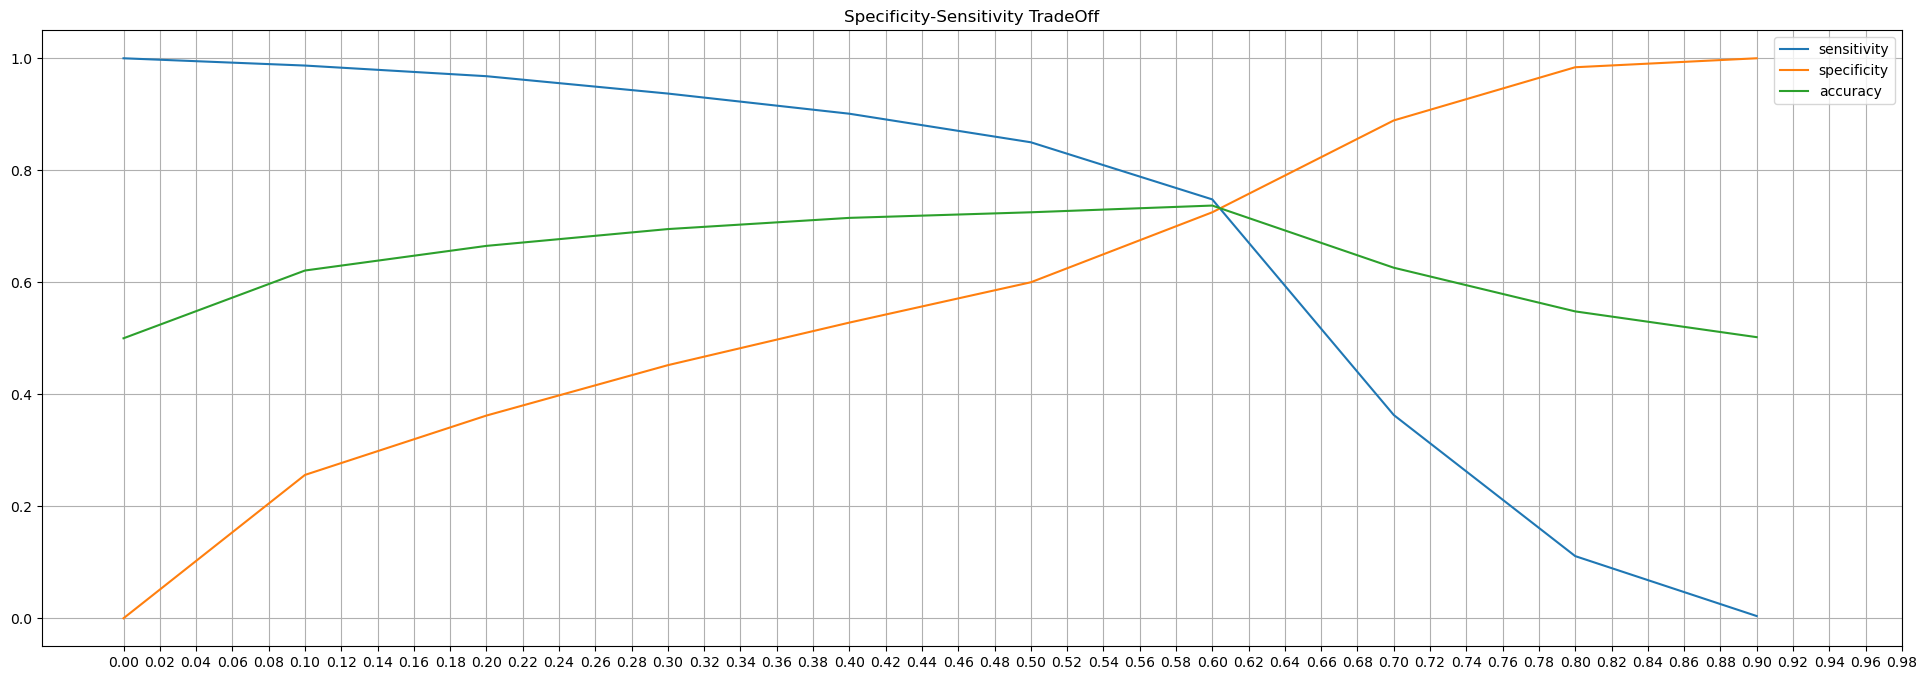

In [142]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

The optimum probability cutoff for Logistic regression model is 0.61

In [144]:
optimum_cutoff = 0.53
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train_resampled, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test2, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[12012  7175]
 [ 3291 15896]]

Confusion Matrix for test: 
 [[4421 1055]
 [ 185  342]]


In [145]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.727
Sensitivity / True Positive Rate / Recall : 0.828
Specificity / True Negative Rate :  0.626
Precision / Positive Predictive Value : 0.689
F1-score : 0.752


Test Performance : 

Accuracy : 0.793
Sensitivity / True Positive Rate / Recall : 0.649
Specificity / True Negative Rate :  0.807
Precision / Positive Predictive Value : 0.245
F1-score : 0.356


### Model 1 : Logistic Regression (Interpretable Model Summary)

In [146]:
lr_summary_html = logr3_fit.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most important predictors of Churn , in order of importance and their coefficients are as follows : 



monthly_2g_8       -3.3972
monthly_3g_8       -1.9501
monthly_2g_7       -0.9908
monthly_2g_6       -0.8029
sachet_3g_8_0       0.7483
loc_ic_t2f_mou_8   -0.7297
sachet_2g_8_0       0.5590
const               0.5501
sachet_3g_6_0      -0.5497
sachet_2g_6_0      -0.5376
std_ic_t2f_mou_8   -0.2933
sachet_2g_7_0      -0.2662
std_og_t2f_mou_8   -0.1565
isd_og_mou_7        0.1072
total_rech_num_6   -0.0087
total_rech_num_8   -0.0087
Name: coef, dtype: float64

## PCA

In [147]:
from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 
pca.fit(X_train1) # note that pca is fit on original train set instead of resampled train set. 
pca.components_

array([[ 1.64558630e-01,  1.94668192e-01,  1.70297333e-01, ...,
         4.26132488e-09, -5.24863146e-07, -7.26993618e-07],
       [ 6.60212166e-02,  9.78548993e-02,  1.22377145e-01, ...,
        -1.45419977e-06, -1.99935180e-06, -1.68085155e-06],
       [-2.24559351e-01, -2.67641144e-01, -2.46935916e-01, ...,
         9.48494050e-07,  1.68199070e-06, -1.08123226e-07],
       ...,
       [ 6.23664103e-06,  1.85950394e-06, -7.68803493e-06, ...,
        -8.07406249e-02, -7.76152365e-02, -8.07169661e-02],
       [-0.00000000e+00,  7.73310912e-17, -1.76319066e-17, ...,
        -2.41796975e-17, -4.01684649e-17, -2.41508171e-16],
       [ 0.00000000e+00,  9.74664684e-17,  3.15883233e-17, ...,
        -5.25559916e-15, -1.69940587e-14,  2.29458851e-15]])

In [148]:
pca.explained_variance_ratio_

array([2.73277677e-01, 1.62214259e-01, 1.21206815e-01, 1.05927437e-01,
       9.10980407e-02, 4.64980926e-02, 2.65212361e-02, 2.56192033e-02,
       1.90676443e-02, 1.67504406e-02, 1.55276718e-02, 1.32288238e-02,
       1.05359040e-02, 7.73955491e-03, 7.15455043e-03, 6.10857407e-03,
       5.51032137e-03, 5.45950824e-03, 4.60092835e-03, 4.37529248e-03,
       3.48690935e-03, 3.26651460e-03, 2.89450826e-03, 2.16077303e-03,
       2.08008872e-03, 1.90096433e-03, 1.41959589e-03, 1.27855561e-03,
       1.16867362e-03, 1.06113044e-03, 9.58888208e-04, 9.15846859e-04,
       8.88913259e-04, 7.61550566e-04, 6.85709749e-04, 5.71151028e-04,
       5.31824029e-04, 5.06310336e-04, 4.87253043e-04, 4.44889186e-04,
       4.34322077e-04, 4.11830286e-04, 3.57864415e-04, 3.11697399e-04,
       2.51447323e-04, 2.33781016e-04, 2.09916274e-04, 1.73320477e-04,
       1.65646626e-04, 1.51264786e-04, 1.46283799e-04, 1.14658718e-04,
       1.06159883e-04, 8.85561147e-05, 8.55411998e-05, 7.91692940e-05,
      

#### Scree Plot

Text(0.5, 1.0, 'Scree Plot of Telecom Churn Train Set')

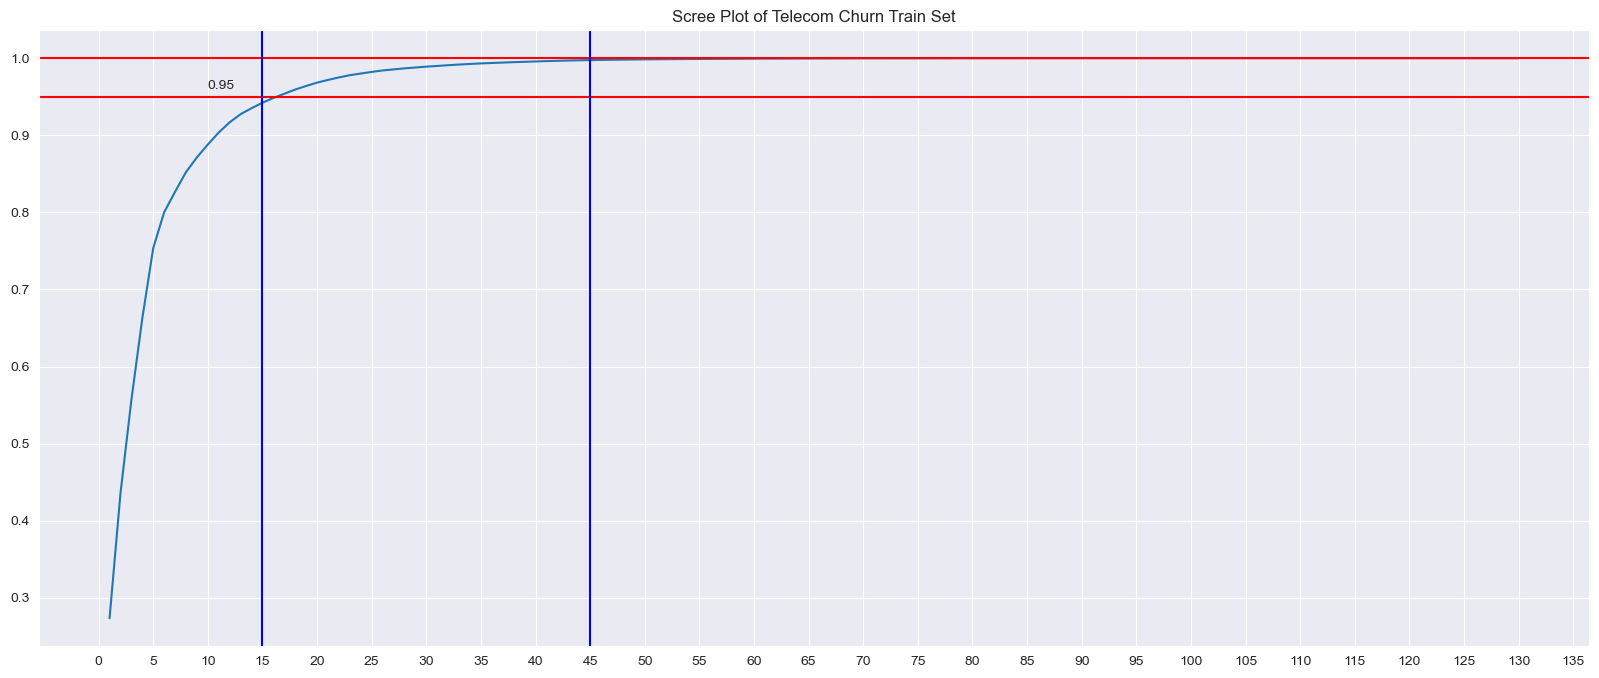

In [149]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20, 8))
sns.set_style('darkgrid')
sns.lineplot(x=np.arange(1, len(var_cum) + 1), y=var_cum)
plt.xticks(np.arange(0, 140, 5))
plt.axhline(0.95, color='r')
plt.axhline(1.0, color='r')
plt.axvline(15, color='b')
plt.axvline(45, color='b')
plt.text(10, 0.96, '0.95')
plt.title('Scree Plot of Telecom Churn Train Set')

From the above scree plot, it is clear that 95% of variance in the train set can be explained by first 16 principal components and 100% of variance is explained by the first 45 principal components.

In [150]:
pca_final = PCA(n_components=45, random_state=42)
transformed_data = pca_final.fit_transform(X_train1)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,46)], index = X_train1.index)
data_train_pca = pd.concat([X_train_pca, y_train1], axis=1)

data_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000224828,690.944202,-920.042189,-78.247908,647.087584,-381.227843,-55.736952,1293.939523,-179.111167,-483.200686,-62.354295,-340.755309,-103.230023,165.920878,-160.581418,14.391219,-40.494069,33.255075,-1.613485,-264.887027,28.973358,58.635218,-6.565902,-6.796753,-10.772698,3.031050,0.181409,-6.187546,-39.737082,-9.221517,-16.619921,-18.556361,-10.211054,-43.288746,-12.025401,3.761429,-8.478149,6.163894,18.945000,29.511756,-14.970870,16.209452,10.806914,-15.061499,-5.898401,18.336621,1
7002182249,2975.384044,1812.789521,-2109.899984,1320.703681,1808.345261,-1077.739276,-476.533654,17.472751,705.429733,-184.761093,677.435537,-228.934895,-396.808662,371.975718,-112.760852,-4.531769,226.091339,-230.972436,47.554639,-50.813733,-94.715162,140.564599,-332.931599,-60.248438,100.826278,-79.897919,83.256275,26.032566,-114.137947,101.395145,74.063397,-157.119010,-51.227714,-82.432000,-112.213784,3.815240,-114.294163,-98.390215,22.387279,7.451732,-119.588901,30.507336,-113.418537,18.939491,-42.993386,0
7001976501,782.570563,-116.755806,1020.894210,899.926082,-276.524677,-1776.442424,446.945132,-157.360823,602.186083,477.715269,438.114422,-207.890149,386.097256,101.512984,-295.855438,407.626176,187.591304,245.914241,109.677196,-59.445869,-10.436216,-73.536499,107.043328,-90.348102,-82.154624,-108.038198,-55.724538,81.863972,-127.808533,-20.751637,13.733412,-84.227086,-200.532329,21.085218,-100.797433,-36.401233,-26.548387,27.166615,16.472193,-3.863952,-34.373550,-37.442109,-26.526357,-36.043286,4.903212,0
7001690852,468.164729,2945.838907,1425.308565,1733.841759,-1182.338959,-123.186764,388.770125,314.452745,-121.001853,301.927453,-235.753620,-275.745905,-71.706303,366.025424,10.056588,213.113375,48.421638,3.065044,-158.090261,-80.876347,116.090695,-129.381099,-17.178875,49.241766,-1.820999,-104.719665,-38.220594,-38.788331,-29.476149,-57.960044,76.134825,-87.631385,-5.064627,-24.321004,30.360645,-74.807791,106.053188,31.485616,-86.530301,10.821224,-28.180407,-7.368165,-49.505110,-2.562586,-5.932939,0
7000587426,361.634932,-1158.256657,-595.366367,-151.088493,-21.696434,-53.022943,-12.344747,7.262966,-31.652619,-59.398696,-89.226531,83.142645,17.436348,50.171583,-1.643469,12.331321,-80.816754,11.046645,23.548145,41.894646,13.784552,-4.083718,4.781684,9.186071,13.379480,8.011046,-29.551804,5.497214,-64.531568,-10.926560,-3.267912,5.236178,-18.677225,42.283954,36.500515,8.810771,-11.286047,-42.727144,-16.414697,14.870952,-45.601554,3.736107,27.925531,27.473629,-15.711768,1


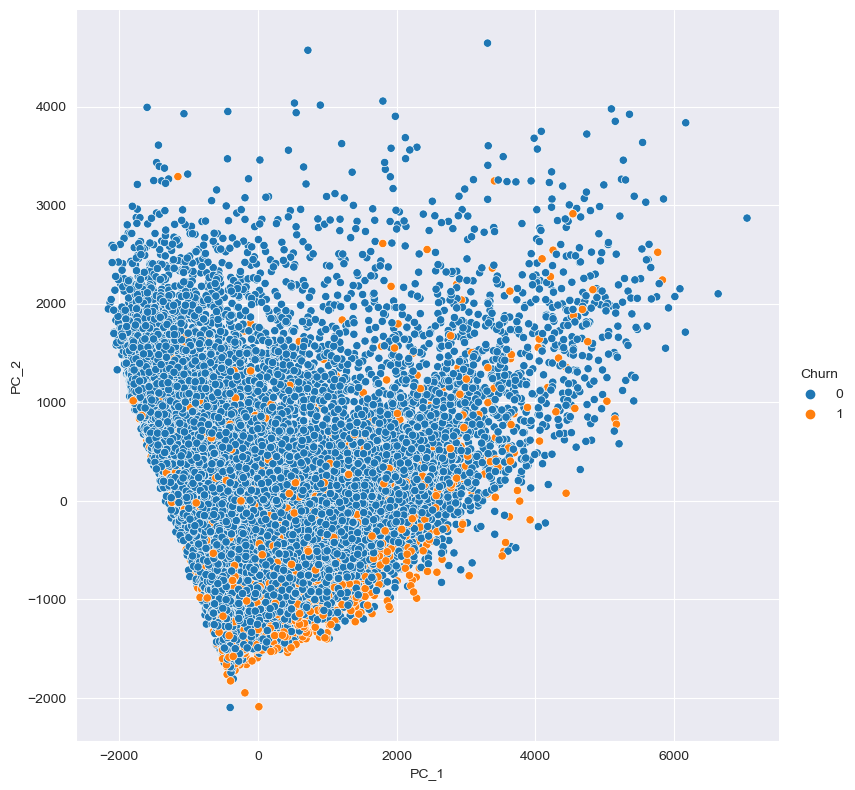

In [151]:
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Churn", size=8);

Model 2 : PCA + Logistic Regression Model

In [152]:
y_train_pca = data_train_pca.pop('Churn')
X_train_pca = data_train_pca

# Transforming test set with pca ( 45 components)
X_test_pca = pca_final.transform(X_test2)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca ) 

LogisticRegression(class_weight='balanced', random_state=100)

In [153]:
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca, y_train_pca)

LogisticRegression(class_weight='balanced', random_state=100)

In [154]:
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [156]:
from sklearn.impute import SimpleImputer

# Assuming X_test has missing values
# Initialize the imputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data

# Fit and transform the imputer on the test set
X_test_imputed = imputer.fit_transform(X_test2)

# Transform the imputed test set with PCA
X_test_pca = pca_final.transform(X_test_imputed)

# Make predictions using the logistic regression model
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)

# Display the first 5 predictions
print(y_test_pred_lr_pca[:5])

[0 1 0 1 0]


#### Baseline Performance

In [157]:
train_matrix = confusion_matrix(y_train1, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test2, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.635
Sensitivity / True Positive Rate / Recall : 0.916
Specificity / True Negative Rate :  0.609
Precision / Positive Predictive Value : 0.181
F1-score : 0.302

Test Performance :

Accuracy : 0.632
Sensitivity / True Positive Rate / Recall : 0.913
Specificity / True Negative Rate :  0.605
Precision / Positive Predictive Value : 0.182
F1-score : 0.303


#### Hyperparameter Tuning

In [158]:
from sklearn.pipeline import Pipeline
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [159]:
print('Best ROC-AUC score :', search.best_score_)
print('Best Parameters :', search.best_params_)

Best ROC-AUC score : 0.8759105087829779
Best Parameters : {'C': 3, 'penalty': 'l2'}


In [160]:
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [161]:
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [163]:
train_matrix = confusion_matrix(y_train1, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test2, y_test_pred_lr_pca_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.639
Sensitivity / True Positive Rate / Recall : 0.912
Specificity / True Negative Rate :  0.614
Precision / Positive Predictive Value : 0.182
F1-score : 0.303

Test Performance :

Accuracy : 0.634
Sensitivity / True Positive Rate / Recall : 0.907
Specificity / True Negative Rate :  0.608
Precision / Positive Predictive Value : 0.182
F1-score : 0.303


# Recommendation

In [ ]:
print('Most Important Predictors of churn , in the order of importance are : ')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

### Conclusion from above case study:

##### Strongest Indicators of Churn:
Average Monthly Local Incoming Calls from Fixed Line:

Customers who churn show lower average monthly local incoming calls from a fixed line in the action period by 1.27 standard deviations.


##### Number of Recharges Done in Action Period:

Customers who churn exhibit a lower number of recharges done in the action period by 1.20 standard deviations.
Higher Recharge Amount:

Churning customers have done 0.6 standard deviations higher recharge than non-churn customers.
Usage of 'Monthly 2G Package-0 / Monthly 3G Package-0':

Customers who churn are more likely to be users of 'monthly 2g package-0 / monthly 3g package-0' in the action period (approximately 0.3 standard deviations higher than other packages).
Recommendations:


##### Focus on Customers with Lower Incoming Calls:

Concentrate on users with 1.27 standard deviations lower than the average incoming calls from the fixed line. They are most likely to churn.


##### Target Customers with Fewer Recharges:

Concentrate on users who recharge less frequently (less than 1.2 standard deviations compared to the average) in the 8th month. They are the second most likely to churn.


##### Use Models with High Sensitivity:

Models with high sensitivity are recommended for predicting churn. Consider using the PCA + Logistic Regression model, which has an ROC score of 0.87 and a test sensitivity of 100%.


#### Additional Considerations:
###### Continuous Monitoring:

Implement continuous monitoring to track the effectiveness of the recommendations over time.


##### Customer Engagement Strategies:

Develop targeted customer engagement strategies to retain high-risk customers, such as personalized promotions or loyalty programs.
##### Communication Channels:

Explore communication channels to engage with customers identified as high-risk, providing them with relevant offers or assistance.